<a href="https://colab.research.google.com/github/mhmmdmin/Assignment/blob/main/Assignment_Day_12_Muhammad_Amin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install and Load Library

In [1]:
!pip install sktime[all_extras]
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 4.2 MB/s 
     |████████████████████████████████| 3.3 MB 40.3 MB/s 
     |████████████████████████████████| 9.8 MB 17.2 MB/s 
     |████████████████████████████████| 6.9 MB 1.1 MB/s 
     |████████████████████████████████| 43 kB 804 kB/s 
     |████████████████████████████████| 125 kB 41.6 MB/s 
     |████████████████████████████████| 65 kB 3.5 MB/s 
     |████████████████████████████████| 97 kB 5.2 MB/s 
     |████████████████████████████████| 1.4 MB 16.3 MB/s 
     |████████████████████████████████| 136 kB 53.9 MB/s 
     |████████████████████████████████| 11.2 MB 32.1 MB/s 
     |████████████████████████████████| 788 kB 45.8 MB/s 
     |████████████████████████████████| 793 kB 47.5 MB/s 
     |████████████████████████████████| 177 kB 43.9 MB/s 
     |████████████████████████████████| 228 kB 40.5 MB/s 
     |████████████████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# utilities packages
import datetime as dt
from datetime import timedelta

# data wrangling and transformation package
import numpy as np
import pandas as pd
pd.set_option("max_columns",None)
import statsmodels.api as sm

# data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# time series modeling
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot
from statsmodels.stats.diagnostic import acorr_ljungbox

# load sktime for time series forecasting
from sktime.utils.plotting import plot_series # from plotting
from sktime.forecasting.naive import NaiveForecaster # for naive forecasting
from sktime.forecasting.arima import AutoARIMA # for automated ARIMA forecasting
from sktime.forecasting.exp_smoothing import ExponentialSmoothing # for exponential smoothing forecasting
from sktime.forecasting.ets import AutoETS # for automated ETS forecasting 
from sktime.forecasting.tbats import TBATS # for TBATS forecasting
from sktime.forecasting.fbprophet import Prophet # for Prophet forecasting
from sktime.forecasting.base import ForecastingHorizon # for creating forecast horizon
from sktime.forecasting.model_selection import (
    temporal_train_test_split, 
    ExpandingWindowSplitter, 
    SlidingWindowSplitter
) # for train-test split and cross validation
from sktime.performance_metrics.forecasting import (
    mean_absolute_error, 
    mean_squared_error, 
    mean_absolute_percentage_error
) # for evaluation metrics
from sktime.forecasting.model_evaluation import evaluate # for evaluating CV results

%matplotlib inline

#Load Dataset

In [4]:
# Load dataset for basic task
df1 = pd.read_csv("/content/drive/MyDrive/data/task_1_1.csv")
df2 = pd.read_csv("/content/drive/MyDrive/data/task_1_2.csv")
df3 = pd.read_csv("/content/drive/MyDrive/data/task_1_3.csv")
df4 = pd.read_csv("/content/drive/MyDrive/data/task_1_4.csv")
df5 = pd.read_csv("/content/drive/MyDrive/data/task_1_5.csv")
df6 = pd.read_csv("/content/drive/MyDrive/data/task_1_6.csv")
df7 = pd.read_csv("/content/drive/MyDrive/data/task_1_7.csv")
df8 = pd.read_csv("/content/drive/MyDrive/data/task_1_8.csv")
df9 = pd.read_csv("/content/drive/MyDrive/data/task_1_9.csv")
df10 = pd.read_csv("/content/drive/MyDrive/data/task_1_10.csv")

In [5]:
#load dataset for advanced task
ecommerce = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/time_series_data/superstore_time_series_dataset/superstore_train.csv")

#Time Series Analysis - Basic

## Data 1

In [6]:
# Check dataset
df1.head()

,index,value
0,101,1.323913
1,102,1.197747
2,103,-0.951691
3,104,1.904784
4,105,-0.551699


In [7]:
# Check data structure
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    int64  
 1   value   100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


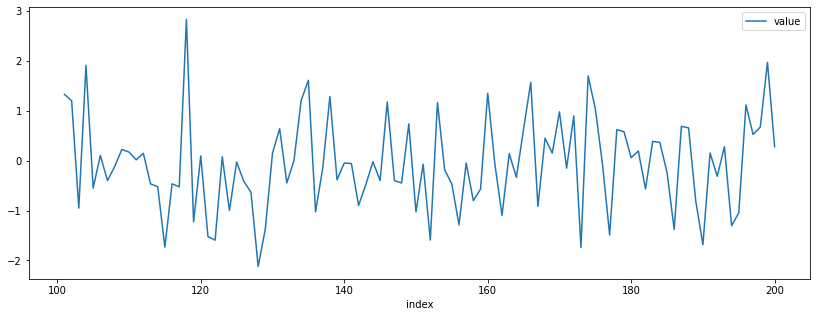

In [8]:
# Visualization
df1.plot(
    x = 'index', 
    y = 'value',
    figsize = (14,5)
)
plt.show()

The trend pattern is stationary and there isn't any cyclic and seasonal pattern.

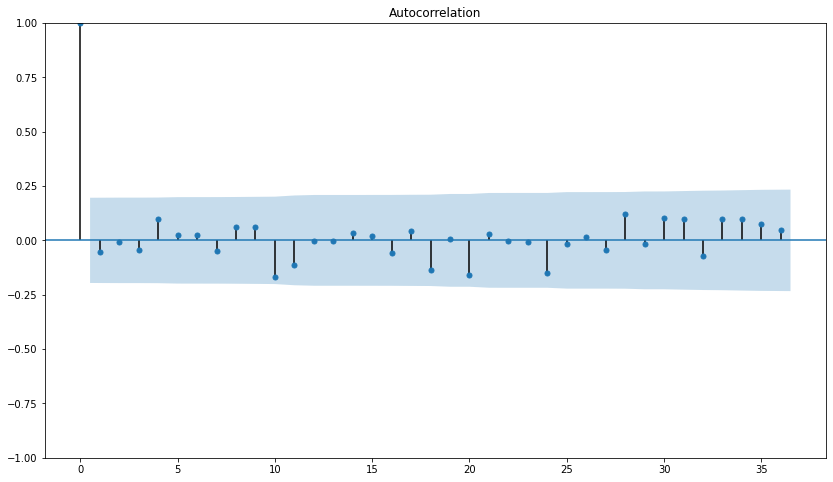

In [9]:
# ACF plotting
plot_acf(
    df1['value'], 
    lags = 36
).set_size_inches((14,8));

There's no significant lag.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


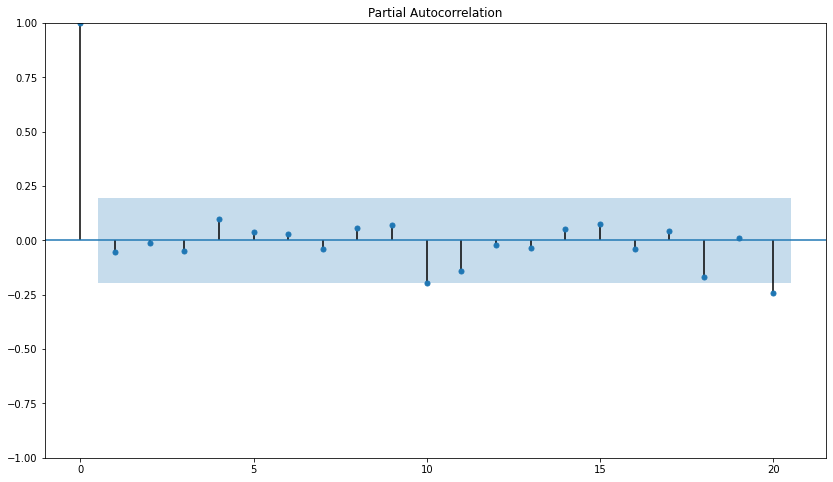

In [10]:
# PACF plotting
plot_pacf(
    df1['value'], 
    lags = 20
).set_size_inches((14,8));

I think there's not any lag either in this PACF plot.

I'll do ADF test to check out if it is needed to be differencing or not.

###**Augmented Dickey-Fuller Test**

- *Null hypothesis*: The series has a unit root. 
- *Alternate Hypothesis*: The series has no unit root. 

Reject H0 if **p-value greater than 5%**

In [11]:
# define adf_test function
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [12]:
adf_test(df1['value'])

Results of Dickey-Fuller Test:
Test Statistic                -1.048554e+01
p-value                        1.183064e-18
#Lags Used                     0.000000e+00
Number of Observations Used    9.900000e+01
Critical Value (1%)           -3.498198e+00
Critical Value (5%)           -2.891208e+00
Critical Value (10%)          -2.582596e+00
dtype: float64


**Interpretation:** This data is stationary.

###INTERPRETATION
After differencing first order I think I don't have to execute the second differencing because the trend is already stagnant or stationary.

For ACF that represents *q* or MA has 0 lag.

For PACF that represents *p* or AR has 0 lag.

So according to *p*, *d*, *q* value this time series is (0,0,0) `white noise` time series.

##Data 2

In [13]:
# Check dataset
df2.head()

,index,value
0,101,2.362450
1,102,3.849367
2,103,2.421574
3,104,5.052382
4,105,4.103413


In [14]:
# Check data structure
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    int64  
 1   value   100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


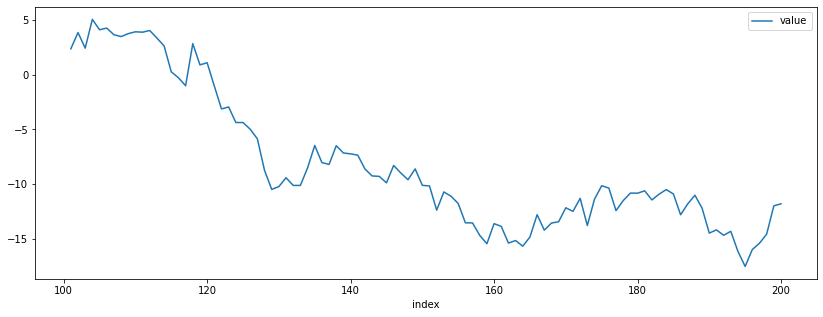

In [15]:
# Visualization
df2.plot(
    x = 'index', 
    y = 'value',
    figsize = (14,5)
)
plt.show()

As we can see that there's a downtrend pattern, I also see slightly a cyclic pattern from 130-190. There is no seasonal pattern. It is absolutely non-stationary time series.

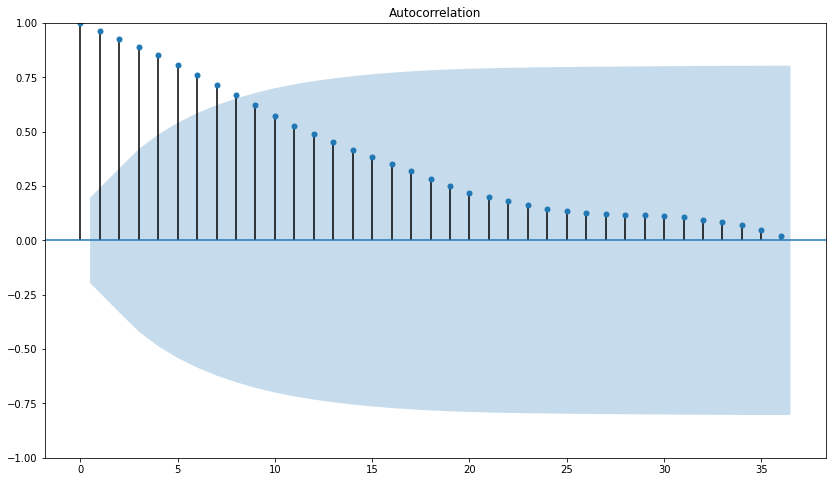

In [16]:
# ACF plot
plot_acf(
    df2['value'], 
    lags = 36
).set_size_inches((14,8));

As my previous hypothesis that I said it is non stationary, there's a downtrend that represents exponential decay pattern in this plot.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


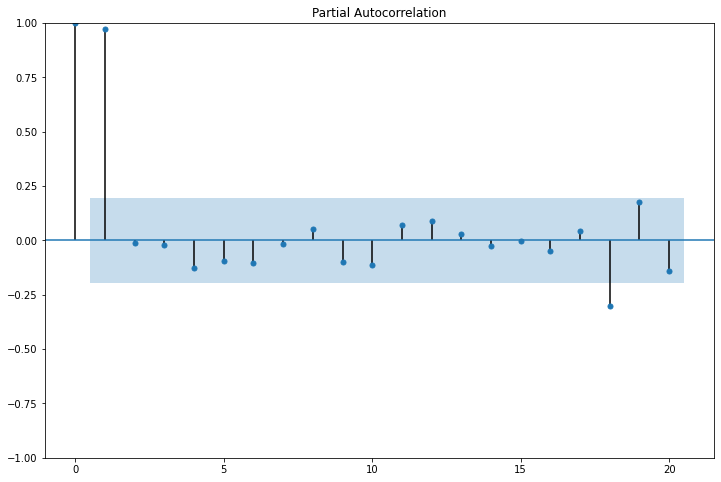

In [17]:
# PACF plot
plot_pacf(
    df2['value'], 
    lags = 20
).set_size_inches((12,8));

For PACF, It is obvious that there's lag 1 in this data. So, my assumption this data is AR 1. But we will do the ADF test to see if we need differencing the data or not.

###ADF TEST

In [18]:
adf_test(df2['value'])

Results of Dickey-Fuller Test:
Test Statistic                 -1.639494
p-value                         0.462525
#Lags Used                      0.000000
Number of Observations Used    99.000000
Critical Value (1%)            -3.498198
Critical Value (5%)            -2.891208
Critical Value (10%)           -2.582596
dtype: float64


The result is p-value is more than 5% which means we shoud differencing the data and reject the null hypothesis.

###Differencing 1st Order

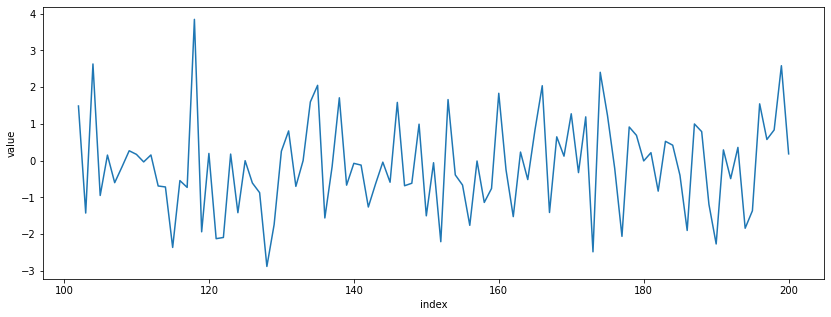

In [19]:
# Visualization of 1st differencing
plt.figure(figsize=(14,5))
sns.lineplot(
    x = df2['index'],
    y = df2['value'].diff(),
    sizes = (14,5)
);

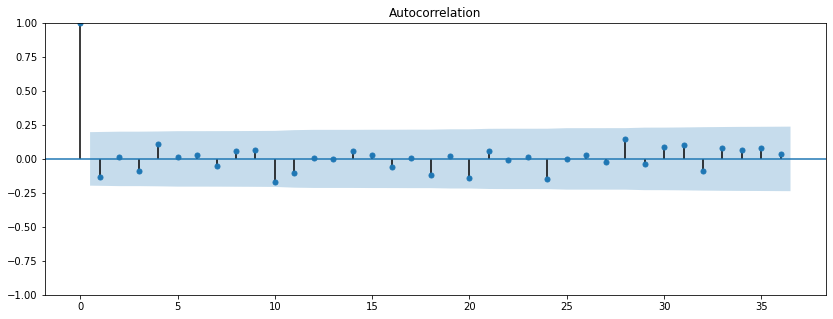

In [20]:
# ACF plot for 1st differencing
plot_acf(
    df2['value'].diff().dropna(), 
    lags = 36
).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


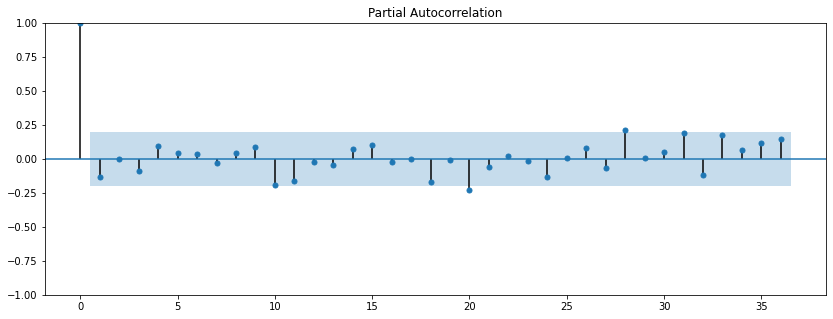

In [21]:
# PACF plot for 1st differencing
plot_pacf(
    df2['value'].diff().dropna(), 
    lags = 36
).set_size_inches((14,5));

###INTERPRETATION
After execute differencing first order, the trend from the data gets stagnant and stationary.

For ACF that represents q or MA, there's an insignificant lag. (*q* = 0)

For PACF that represents p or AR, also has no significant lag. (*p* = 0)

So according to p, d, q value this time series is (0,1,0) which means it is `random walk` time series.

###EXPLANATION
`random walk` means that future steps or directions cannot be predicted on the basis of past history. That's why the AR is 0 and MA is also 0. And it should be non-stationary data.


##Data 3

In [22]:
# Check dataset
df3.head()

,index,value
0,101,-1.405059
1,102,0.471055
2,103,-0.006376
3,104,1.030057
4,105,0.207344


In [23]:
# Check data structure
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    int64  
 1   value   100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


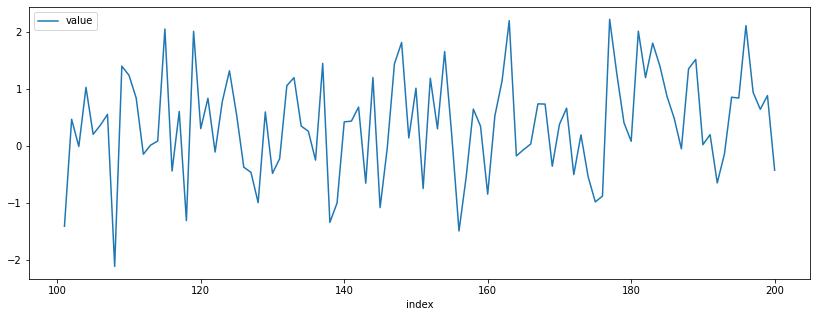

In [24]:
# Visualization
df3.plot(
    x = 'index', 
    y = 'value',
    figsize = (14,5)
)
plt.show()

There's a minor uptrend pattern in this data but I think it is still a stationary data. I think in this data there's no seasonal or cyclic pattern.

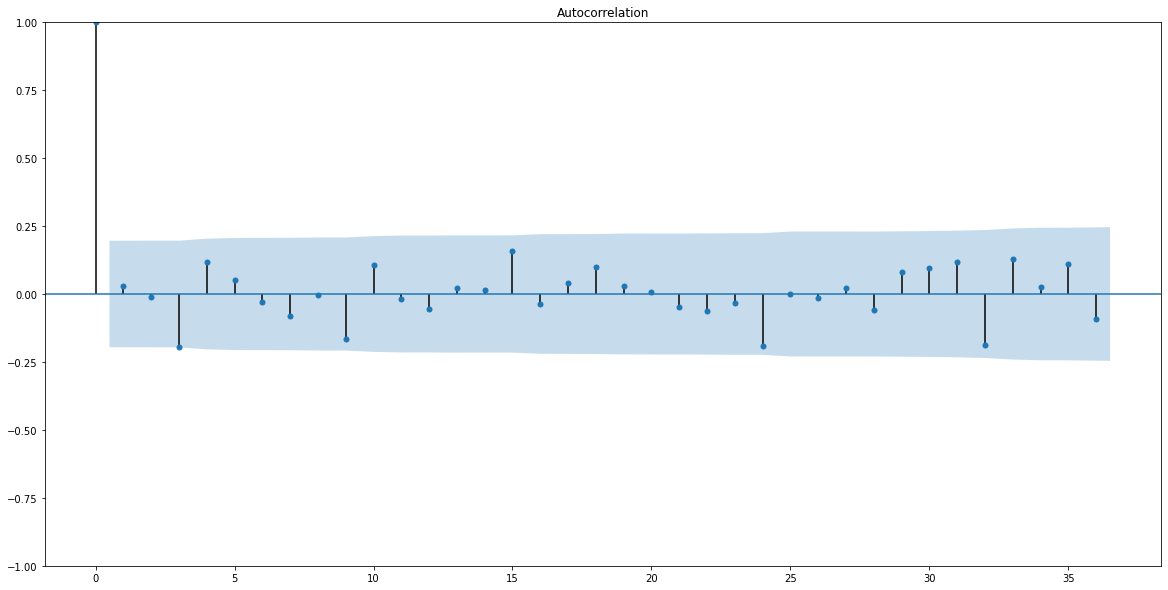

In [25]:
# ACF plot
plot_acf(
    df3['value'], 
    lags = 36
).set_size_inches((20,10));

There's no significant lag for ACF.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


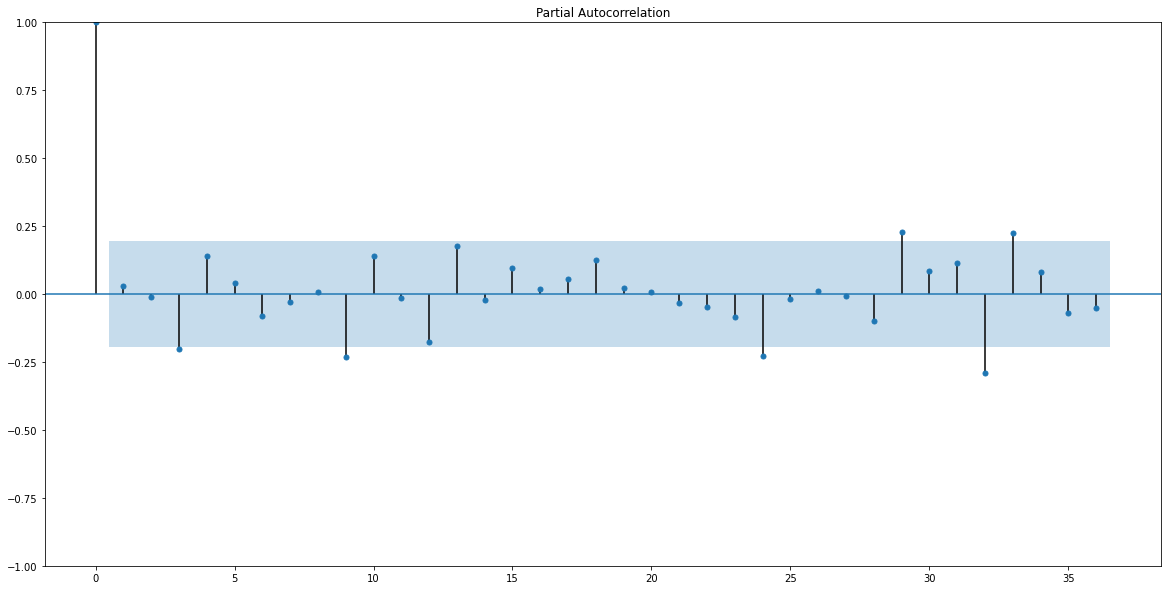

In [26]:
# PACF plot
plot_pacf(
    df3['value'], 
    lags = 36
).set_size_inches((20,10));

In my opinion this PACF has no lag at all.

###ADF TEST

In [27]:
adf_test(df3['value'])

Results of Dickey-Fuller Test:
Test Statistic                 -4.791928
p-value                         0.000056
#Lags Used                      3.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


###INTERPRETATION
Because the p-value is under 5%, we don't need to do differencing which means the *d* is 0.

For ACF that represents *q* or MA, there's an insignificant lag. (*q* = 0)

For PACF that represents *p* or AR, has significant lag at 3. (*p* = 0)

So according to *p*, *d*, *q* value this time series is (0,0,0) which means it is `white noise` time series.

##Data 4

In [28]:
# Check dataset
df4.head()

,index,value
0,1 Jan,14.346754
1,1 Feb,14.877385
2,1 Mar,16.630073
3,1 Apr,18.742186
4,1 Mei,17.657716


In [29]:
# Check data structure
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    object 
 1   value   100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


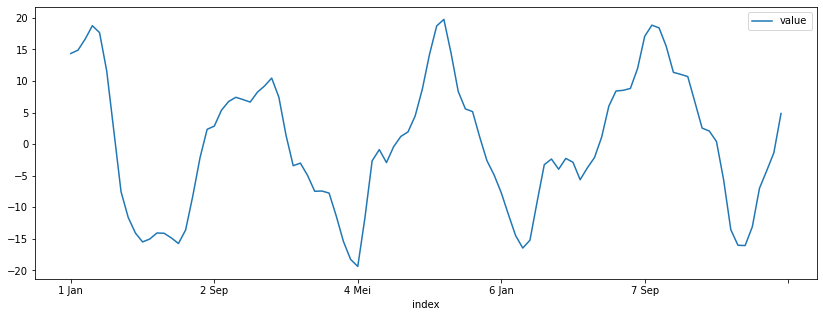

In [32]:
# Visualization
df4.plot(
    x = 'index', 
    y = 'value',
    figsize = (14,5)
)
plt.show()

This data has cylic pattern and no seasonal pattern.

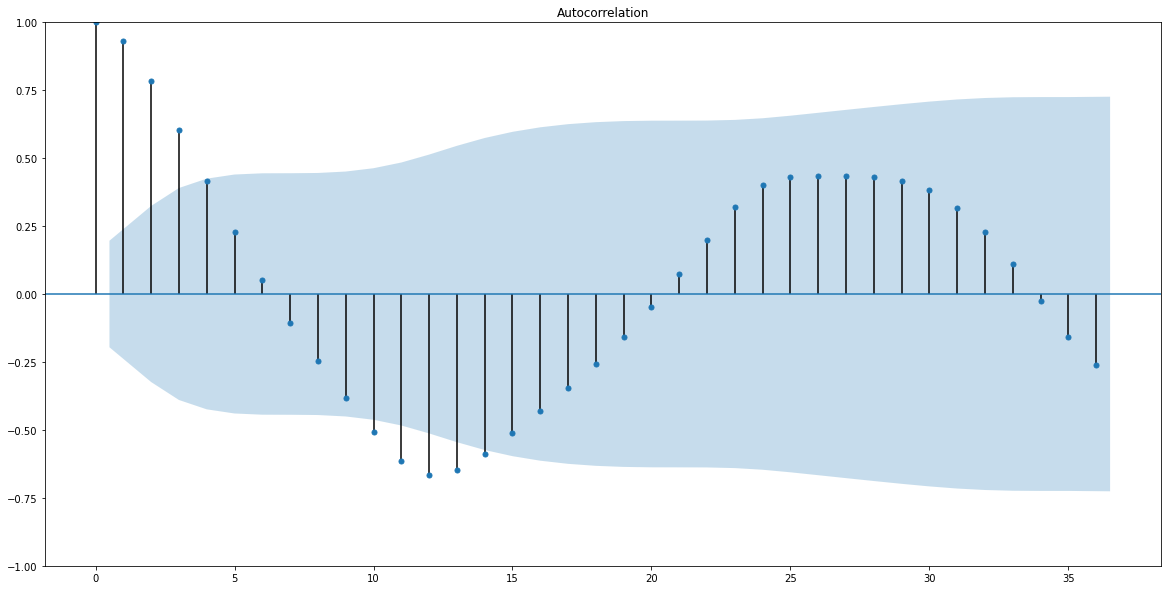

In [33]:
# ACF plot
plot_acf(
    df4['value'], 
    lags = 36
).set_size_inches((20,10));

In this ACF plot, this data draws a damped sinusoidal and we should ignore this ACF plot.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


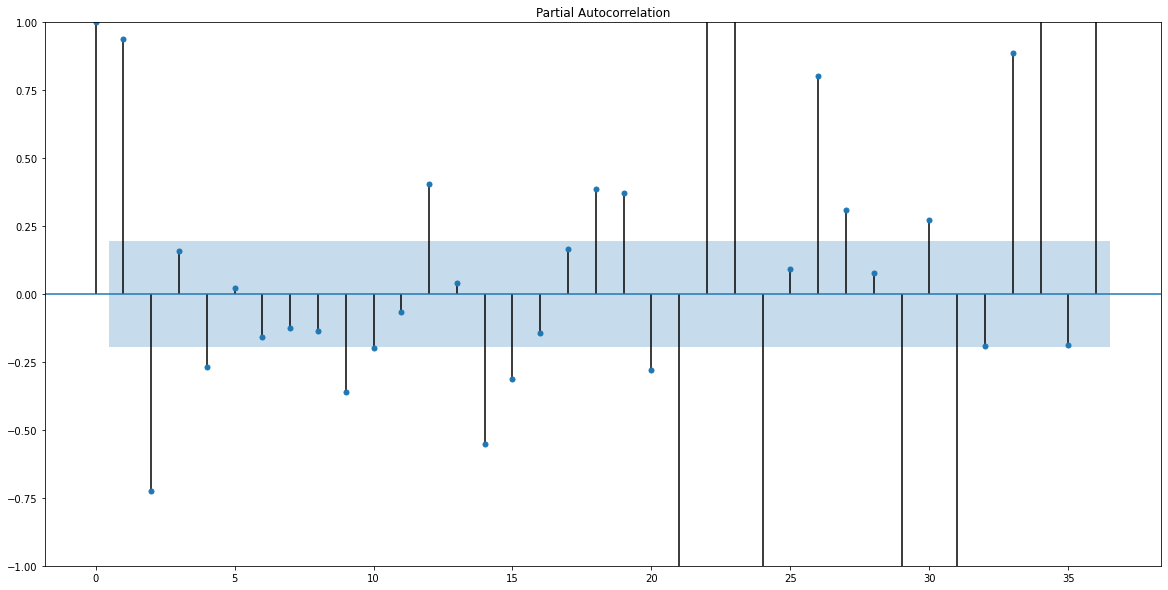

In [34]:
# PACF plot
plot_pacf(
    df4['value'], 
    lags = 36
).set_size_inches((20,10));

This PACF plot has 2 lag significant which should be AR 2.

###ADF TEST

In [35]:
adf_test(df4['value'])

Results of Dickey-Fuller Test:
Test Statistic                 -2.410236
p-value                         0.138868
#Lags Used                     11.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64


Because the p-value is more than 5%, we should do differencing for this data.

###Differencing 1st Order

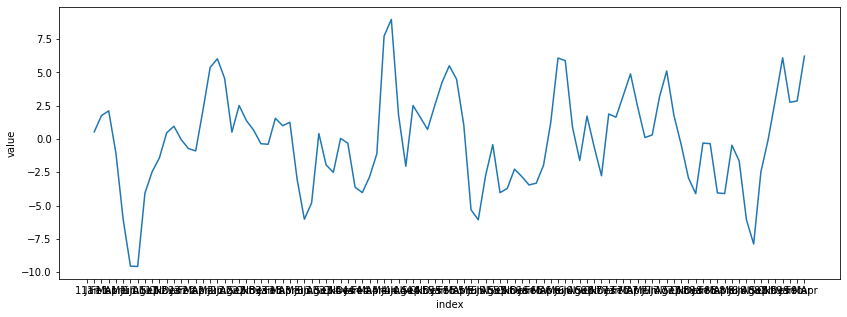

In [39]:
# Visualization 1st differencing
plt.figure(figsize=(14,5))
sns.lineplot(
    x = df4['index'],
    y = df4['value'].diff(),
    sizes = (14,5)
);

The data tends to be slightly stationary after we execute the first differencing.

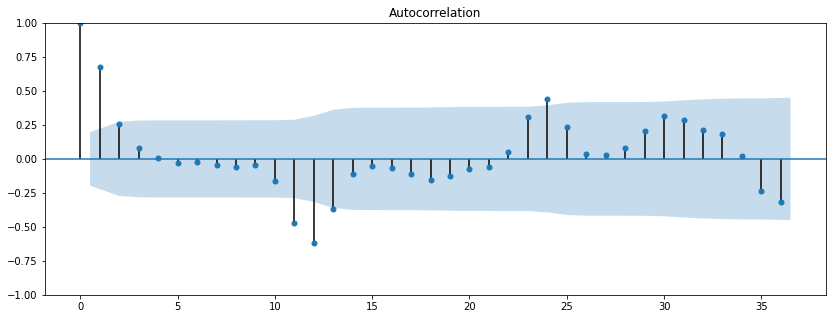

In [40]:
# ACF plot for 1st differencing
plot_acf(
    df4['value'].diff().dropna(), 
    lags = 36
).set_size_inches((14,5));

I think this ACF plot tells us that MA is 1.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


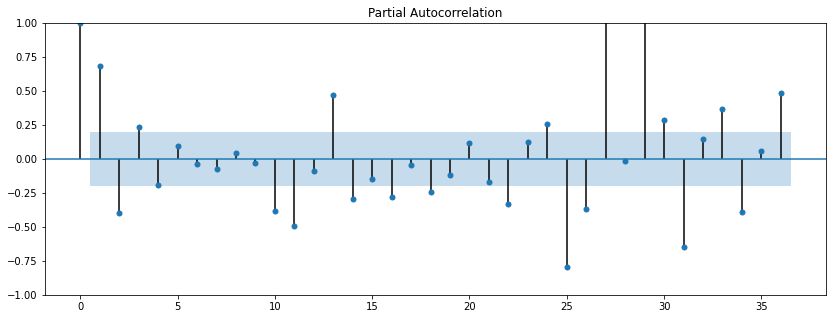

In [41]:
# PACF plot for 1st differencing
plot_pacf(
    df4['value'].diff().dropna(), 
    lags = 36
).set_size_inches((14,5));

For PACF plot, I think it becomes 3 lag significant. Which means it is a AR 3.

But, I'll try to do differencing once more, to see if I could get a better result than the first differencing.

###INTERPRETATION

Because the p-value is above 5%, we need to do differencing, and we execute it two times which means the *d* is 1.

For ACF that represents *q* or MA, there're significant lag till 2. (*q* = 1)

For PACF that represents *p* or AR, has significant lag at 3. (*p* = 3)

So according to *p*, *d*, *q* value this time series is (3,1,1) which means it is `ARIMA (3,1,1)` time series.

###EXPLANATION
`ARIMA (3,1,1)` means that there are 3 lags of AR to be used as predictors. And 1 lagged forecast errors that should go in ARIMA model after we did 2 times differencing order.

##Data 5

In [47]:
# Check dataset
df5.head()

,index,value
0,1 Jan,3.010220
1,1 Feb,0.500811
2,1 Mar,0.430380
3,1 Apr,3.807056
4,1 Mei,1.347951


In [48]:
# Check data structure
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    object 
 1   value   100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


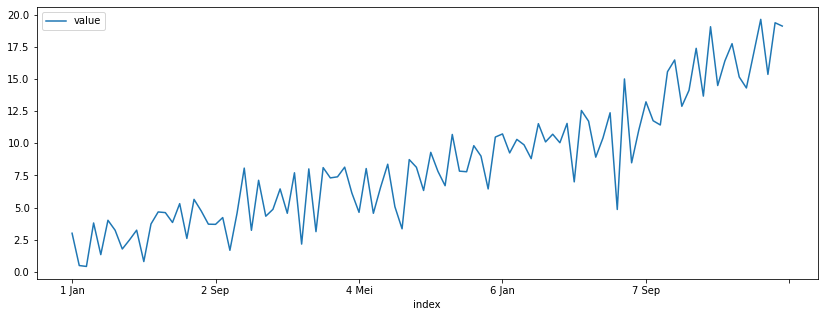

In [50]:
# Visualization
df5.plot(
    x = 'index', 
    y = 'value',
    figsize = (14,5)
)
plt.show()

There's a seasonal pattern in this data and has no cyclic pattern. Also, the trend of this data seems going up which means non stationary.

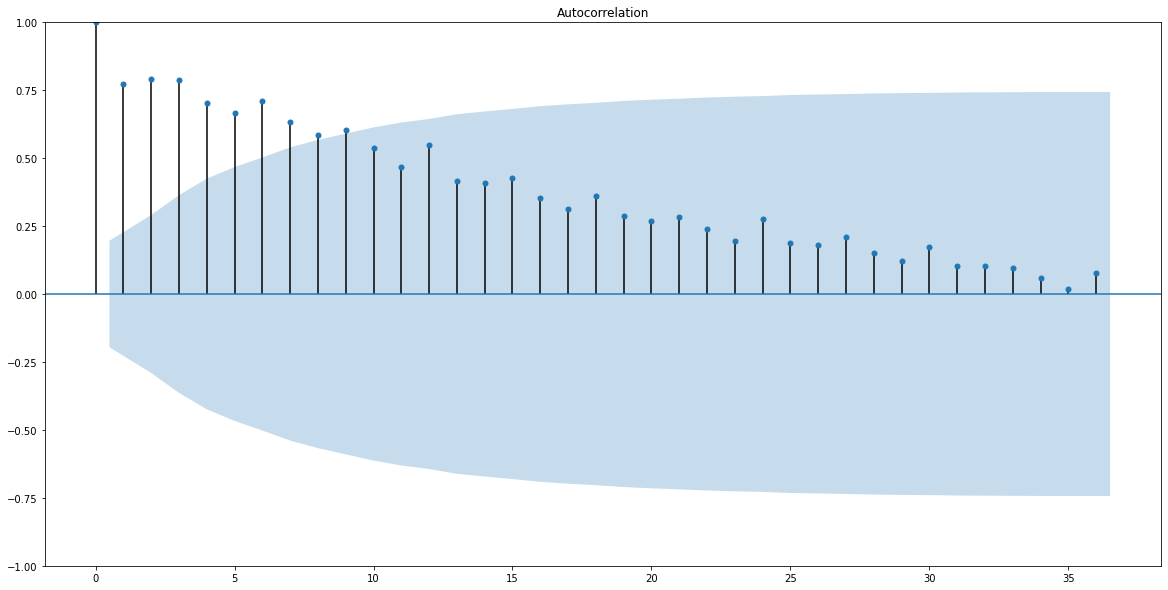

In [51]:
# ACF plot
plot_acf(
    df5['value'], 
    lags = 36
).set_size_inches((20,10));

Because exponential decay appears in this ACF plot we can ignore this plot.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


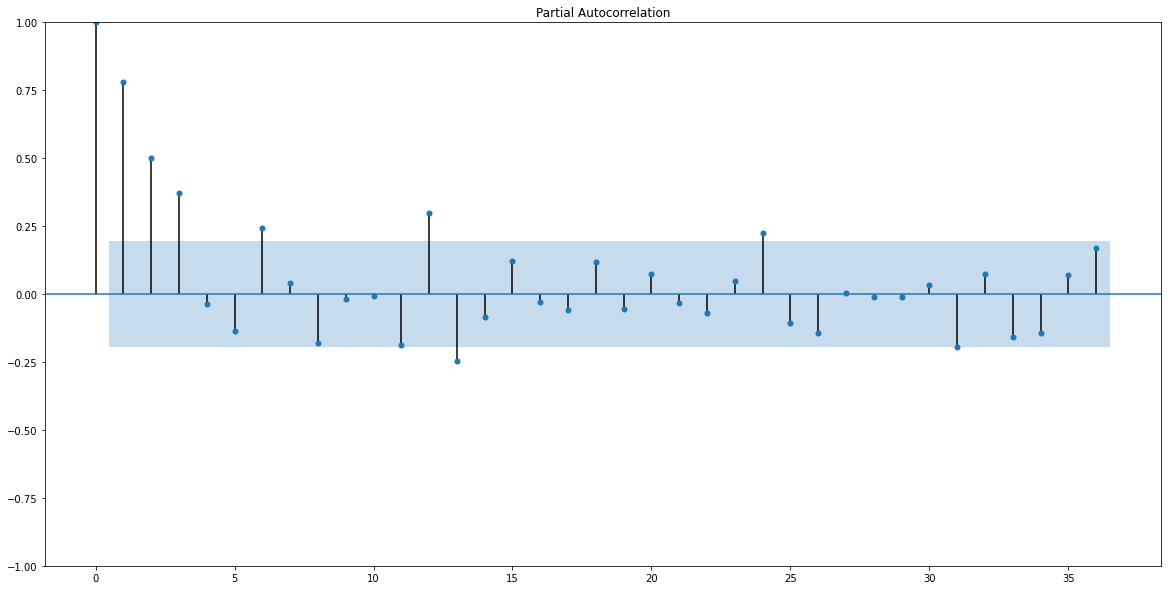

In [52]:
# PACF plot
plot_pacf(
    df5['value'], 
    lags = 36
).set_size_inches((20,10));

PACF plot tells us there are 3 lags. So it may be an AR 3.

###ADF TEST

In [53]:
adf_test(df5['value'])

Results of Dickey-Fuller Test:
Test Statistic                  1.965343
p-value                         0.998626
#Lags Used                     12.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


Because the p-value is 99%, we should execute the differencing.

###Differencing 1st Order

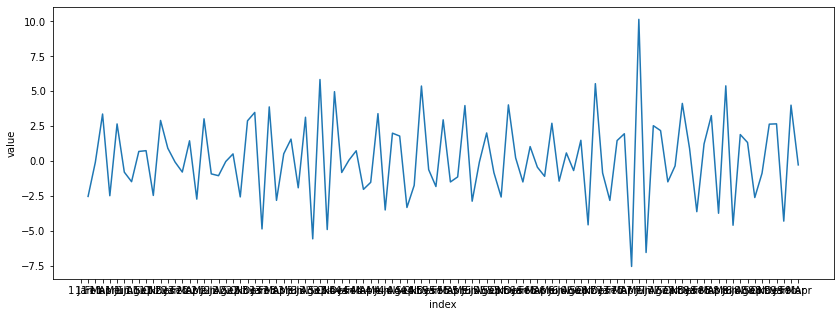

In [55]:
# Visualization of 1st differencing
plt.figure(figsize=(14,5))
sns.lineplot(
    x = df5['index'],
    y = df5['value'].diff(),
    sizes = (14,5)
);

The data has changed and seems to be stationary.

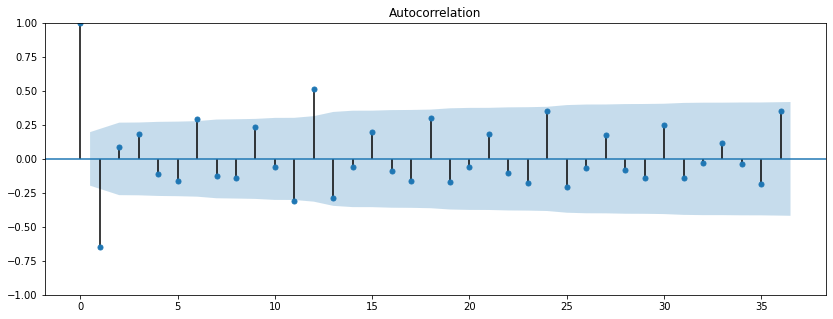

In [56]:
# ACF plot for 1st differencing
plot_acf(
    df5['value'].diff().dropna(), 
    lags = 36
).set_size_inches((14,5));

For the ACF plot, it is absolutely only 1 lag. So, the MA is 1.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


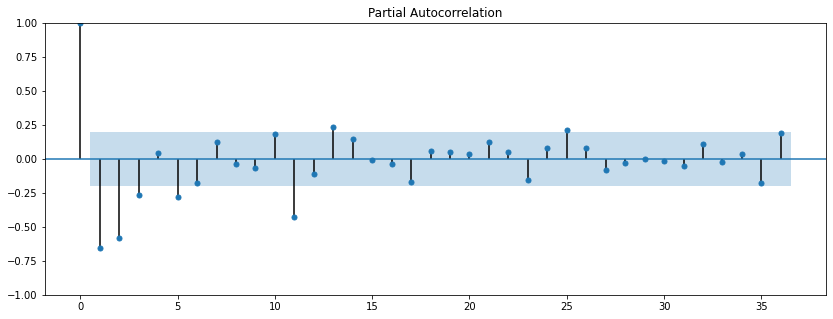

In [57]:
# PACF plot for 1st differencing
plot_pacf(
    df5['value'].diff().dropna(), 
    lags = 36
).set_size_inches((14,5));

For the PACF, it tells us that it has 3 lags. So, the AR is 3.

###INTERPRETATION

Because the p-value is 99%, we need to execute differencing. And I think once is enough, so the *d* is 1.

For ACF that represents *q* or MA, there's a significant lag at 1. (*q* = 1)

For PACF that represents *p* or AR, has significant lag at 3. (*p* = 3)

So according to *p*, *d*, *q* value this time series is (3,1,1) which means it is `ARIMA (3,1,1)` time series.

###EXPLANATION
`ARIMA (3,1,1)` means that there are 3 lags of AR to be used as predictors. And 1 lagged forecast errors that should go in ARIMA model after we did 1 differencing order.

##Data 6

In [58]:
# Check dataset
df6.head()

,index,value
0,1 Jan,0.183993
1,1 Feb,1.712356
2,1 Mar,2.761235
3,1 Apr,2.977488
4,1 Mei,1.681076


In [69]:
# Check data structure
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    object 
 1   value   100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


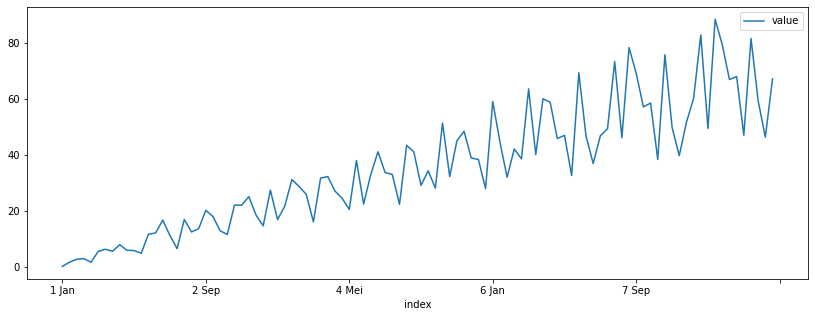

In [60]:
# Visualization
df6.plot(
    x = 'index', 
    y = 'value',
    figsize = (14,5)
)
plt.show()

There's no cyclic pattern. The trend seems to be an uptrend pattern with seasonal pattern.

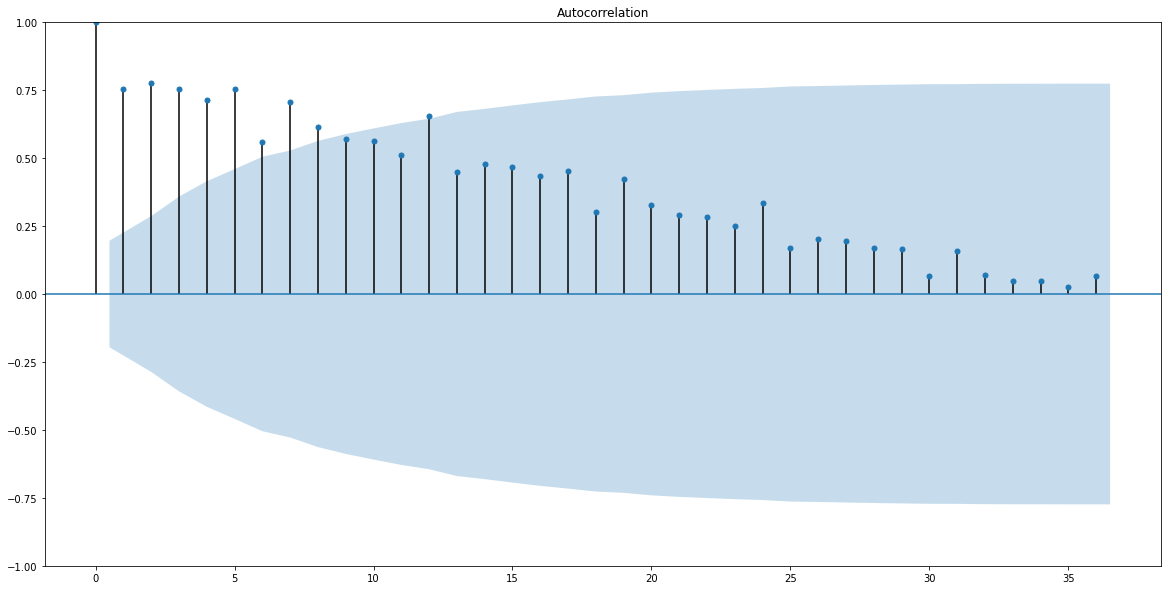

In [61]:
# ACF plot
plot_acf(
    df6['value'], 
    lags = 36
).set_size_inches((20,10));

Because exponential decay pattern occurs in this ACF plot, we can ignore it.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


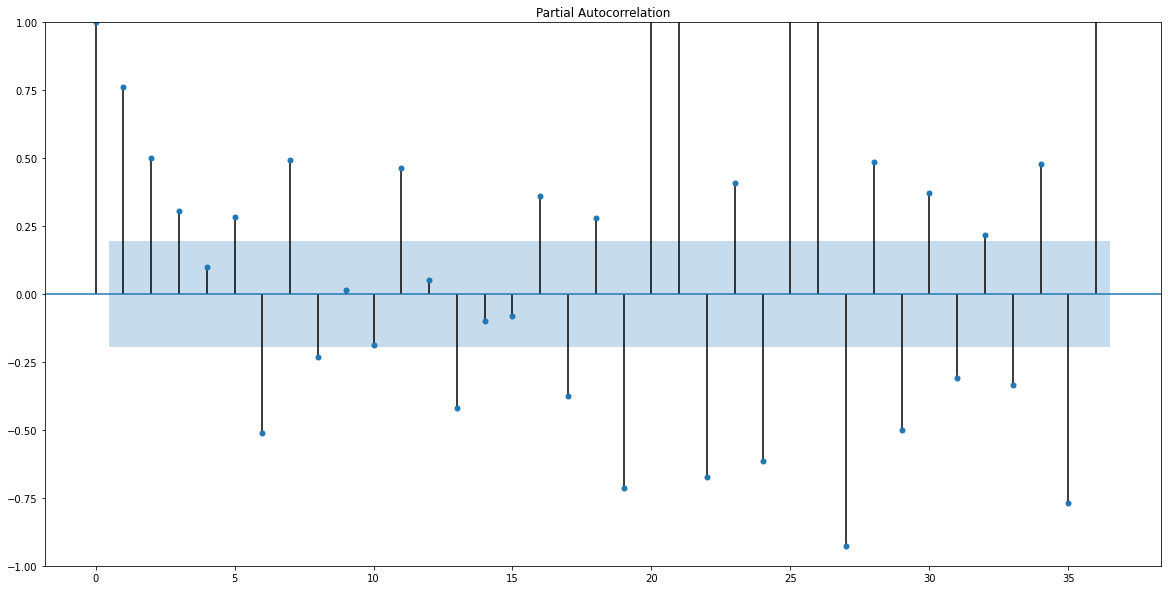

In [62]:
# PACF plot
plot_pacf(
    df6['value'], 
    lags = 36
).set_size_inches((20,10));

For the PACF, it is lag 3 eventho I am not sure with this kind of plot.

###ADF TEST

In [63]:
adf_test(df6['value'])

Results of Dickey-Fuller Test:
Test Statistic                 -0.461408
p-value                         0.899330
#Lags Used                     11.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64


Because the p-value is 89%, we should do differencing and reject null hypothesis.

###Differencing 1st Order

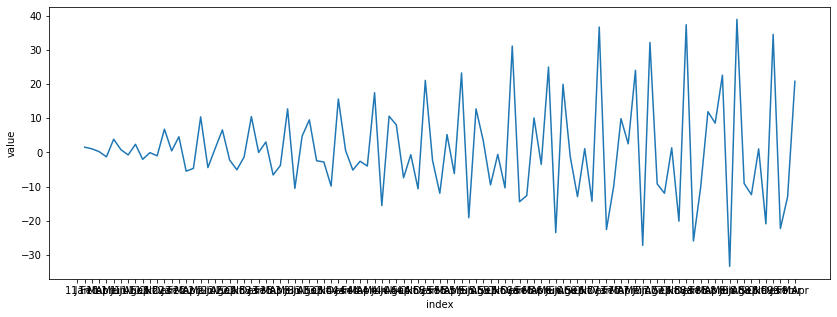

In [65]:
# Visualization of 1st differencing
plt.figure(figsize=(14,5))
sns.lineplot(
    x = df6['index'],
    y = df6['value'].diff(),
    sizes = (14,5)
);

The data changed to be stationary with seasonal pattern.

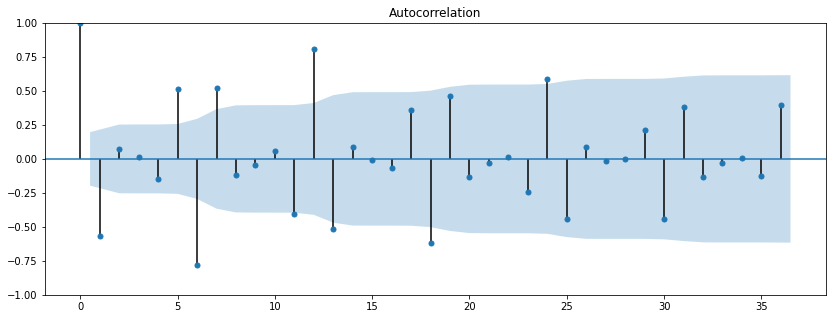

In [66]:
# ACF plot for 1st differencing
plot_acf(
    df6['value'].diff().dropna(), 
    lags = 36
).set_size_inches((14,5));

For 1st differencing ACF plot, it tells us that there is 1 significant lag which means it is MA 1.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


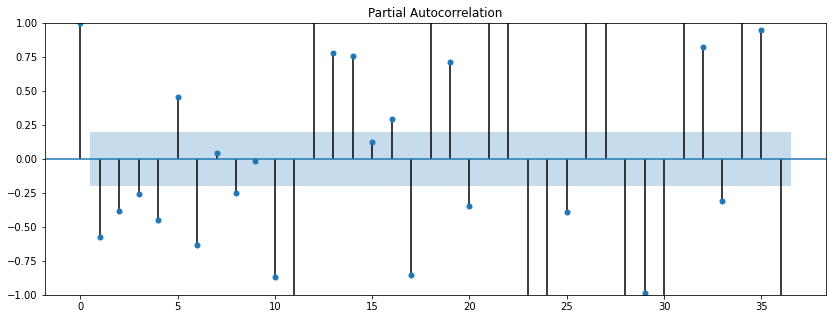

In [68]:
# PACF plot for 1st differencing
plot_pacf(
    df6['value'].diff().dropna(), 
    lags = 36
).set_size_inches((14,5));

For the PACF, after I execute the 1st differencing, it seems there are 6 lags which mean it is AR 6.

###INTERPRETATION

Because the p-value is 89%, we need to execute differencing. And I think once is enough, so the *d* is 1. Because I think it wouldn't change that much if I had executed the second differencing.

For ACF that represents *q* or MA, there's a significant lag at 1. (*q* = 1)

For PACF that represents *p* or AR, has significant lag at 6. (*p* = 6)

So according to *p*, *d*, *q* value this time series is (6,1,1) which means it is `ARIMA (6,1,1)` time series.

###EXPLANATION
`ARIMA (6,1,1)` means that there are 6 lags of AR to be used as predictors. And 1 lagged forecast errors that should go in ARIMA model after we did a differencing order.

##Data 7

In [70]:
# Check dataset
df7.head()

,index,value
0,1 Jan,0.167240
1,1 Feb,4.048346
2,1 Mar,0.898316
3,1 Apr,-5.074511
4,1 Mei,-3.305332


In [71]:
# Check data structure
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    object 
 1   value   100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


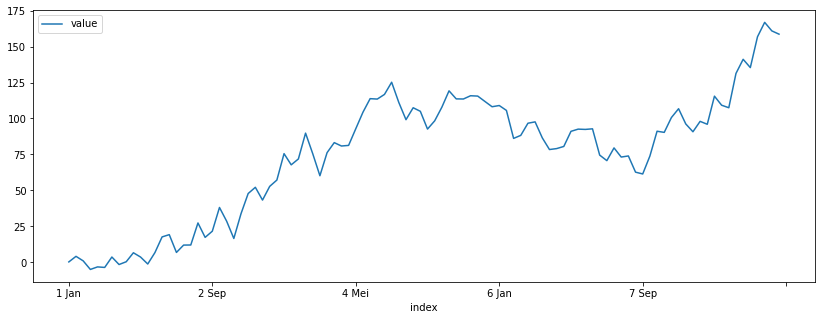

In [72]:
# Visualization
df7.plot(
    x = 'index', 
    y = 'value',
    figsize = (14,5)
)
plt.show()

The trend is absolutely non stationary with cyclic pattern.

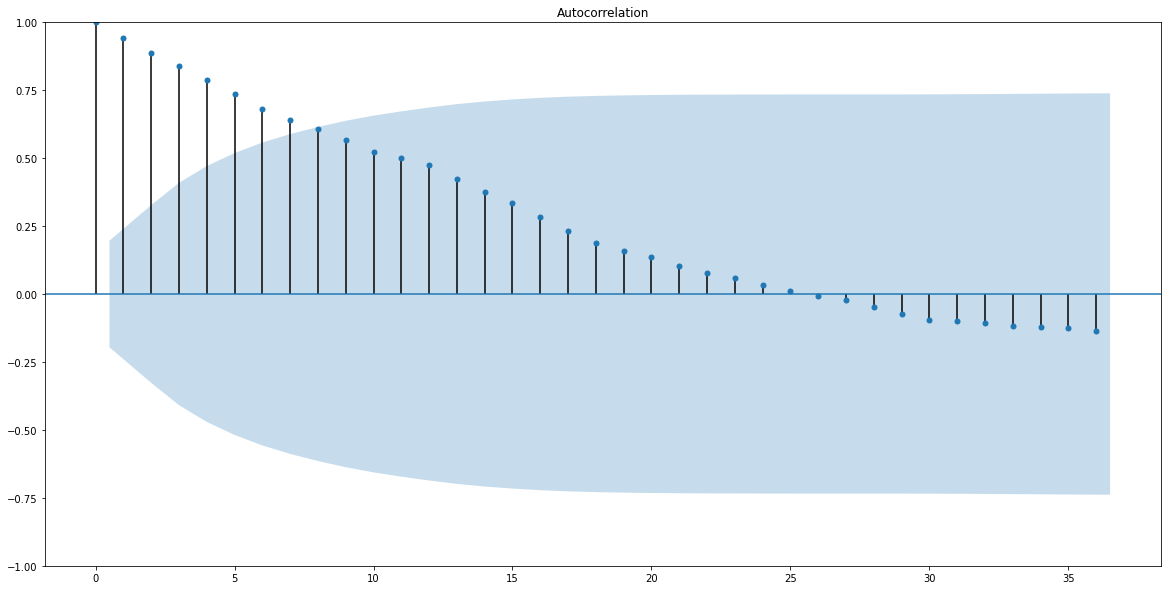

In [73]:
# ACF plot
plot_acf(
    df7['value'], 
    lags = 36
).set_size_inches((20,10));

Exponential decay pattern is occured so we don't have to pay attention to this plot.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


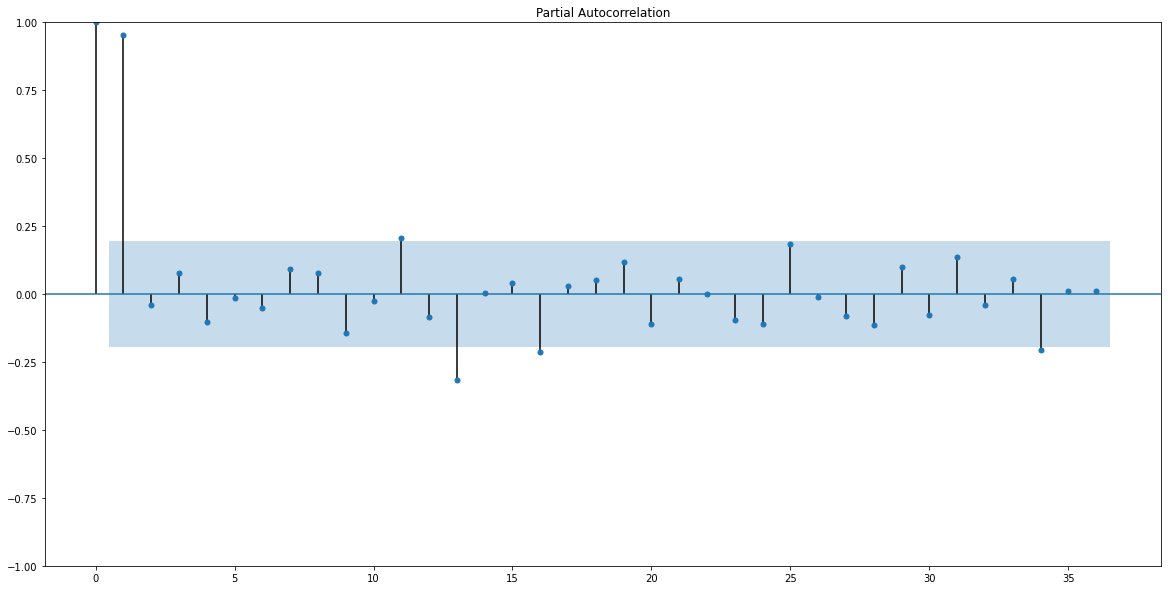

In [74]:
# PACF plot
plot_pacf(
    df7['value'], 
    lags = 36
).set_size_inches((20,10));

PACF plot tells us that it is an AR 1 because there is lag at point 1.

###ADF TEST

In [75]:
adf_test(df7['value'])

Results of Dickey-Fuller Test:
Test Statistic                 -1.427718
p-value                         0.568918
#Lags Used                     12.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


Because the p-value is 56%, we can reject the null hypothesis and do the differencing.

###Differencing 1st Order

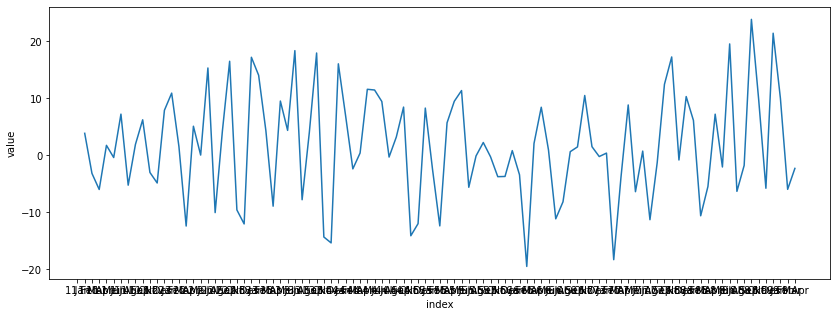

In [77]:
# Visualization of 1st differencing
plt.figure(figsize=(14,5))
sns.lineplot(
    x = df7['index'],
    y = df7['value'].diff(),
    sizes = (14,5)
);

The data has changed, it seems to be a stationary data.

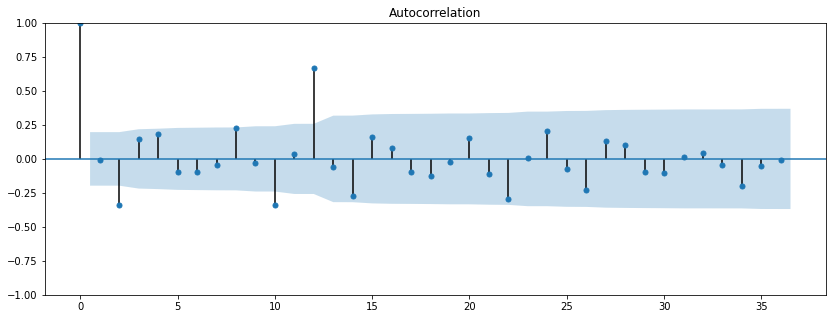

In [78]:
# ACF plot for 1st differencing
plot_acf(
    df7['value'].diff().dropna(), 
    lags = 36
).set_size_inches((14,5));

There's no significant lag in the first lag. which mean the MA is 0.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


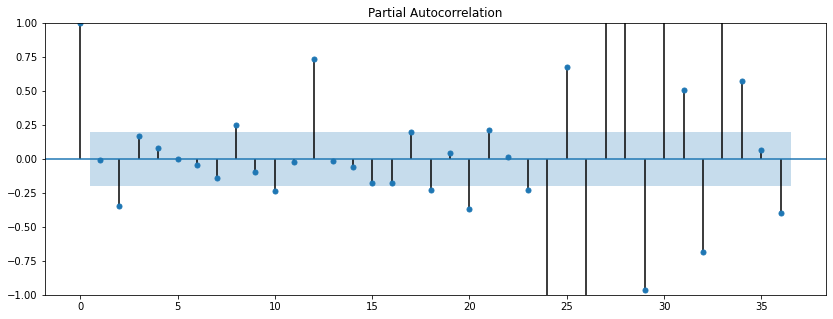

In [79]:
# PACF plot for 1st differencing
plot_pacf(
    df7['value'].diff().dropna(), 
    lags = 36
).set_size_inches((14,5));

Same as previous ACF plot, there's no lag at first point. So, it is AR 0.

###INTERPRETATION

Because the p-value is above 5%, we need to execute differencing. So the *d* is 1.

For ACF that represents *q* or MA, there're significant lag till 2. (*q* = 0)

For PACF that represents *p* or AR, has significant lag at 2. (*p* = 0)

So according to *p*, *d*, *q* value this time series is (2,1,2) which means it is `random walk` time series.


##Data 8

In [80]:
# Check dataset
df8.head()

,index,x
0,1,13
1,2,14
2,3,8
3,4,10
4,5,16


In [81]:
# Check data structure
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   index   99 non-null     int64
 1   x       99 non-null     int64
dtypes: int64(2)
memory usage: 1.7 KB


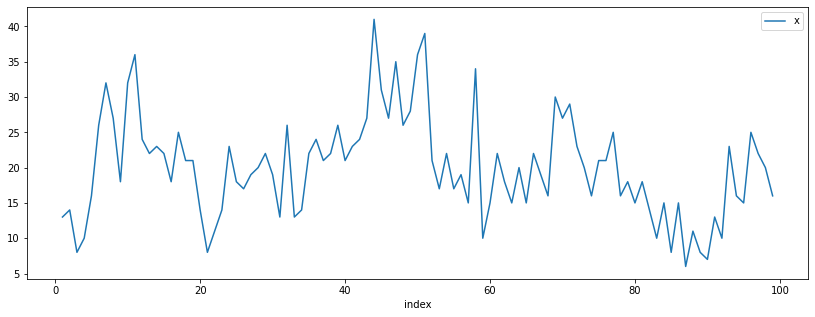

In [82]:
# VIsualization
df8.plot(
    x = 'index', 
    y = 'x',
    figsize = (14,5)
)
plt.show()

I think there's still an uptrend and downtrend in this visualization. I don't think there are any of cyclic and seasonal pattern. I assume this is a non stationary data.

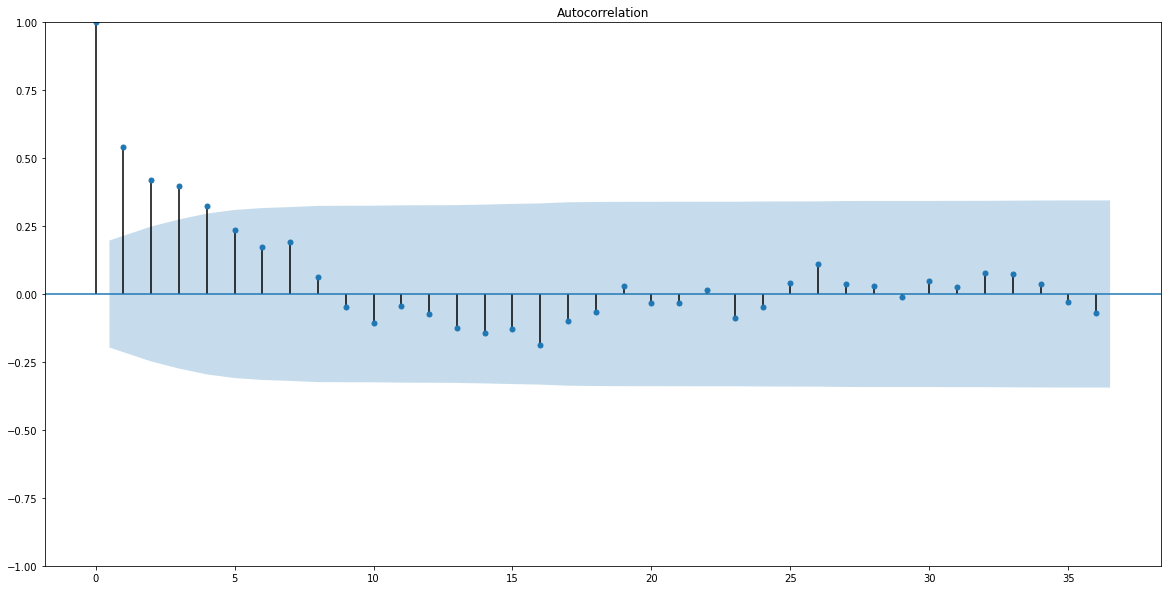

In [83]:
# ACF plot
plot_acf(
    df8['x'], 
    lags = 36
).set_size_inches((20,10));

Exponential Decay is occured so we can ignore this plot.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


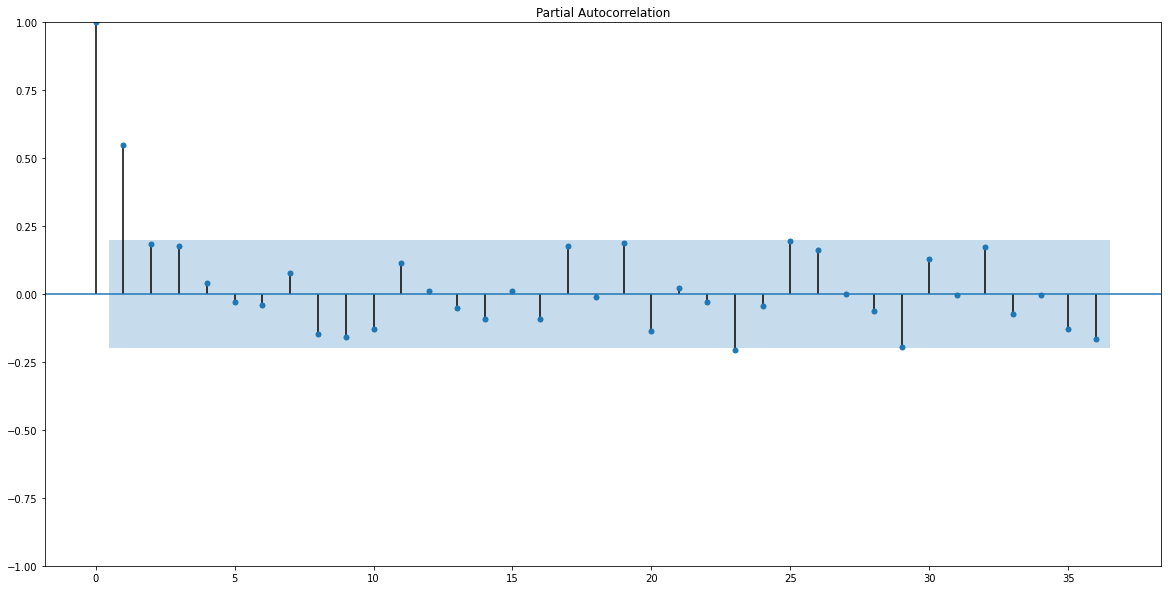

In [84]:
# PACF plot
plot_pacf(
    df8['x'], 
    lags = 36
).set_size_inches((20,10));

There is a significant lag at 1, so I think it will be an AR 1.

###ADF TEST

In [85]:
adf_test(df8['x'])

Results of Dickey-Fuller Test:
Test Statistic                 -3.183192
p-value                         0.020978
#Lags Used                      2.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


###INTERPRETATION

Because the p-value is under 5%, I think we don't need to execute differencing. So the *d* is 0.

For ACF that represents *q* or MA, there's an exponential decay tren. So, I think it will be ignored.

For PACF that represents *p* or AR, has significant lag at 1. (*p* = 1)

So according to *p*, *d*, *q* value this time series is (1,0,0) which means it is `AR 1` time series.

###EXPLANATION
`AR (1)` means that there is 1 lag of AR to be used as predictors in the model later on.

##Data 9

In [86]:
# Check dataset
df9.head()

,index,x
0,1,97.85
1,2,104.64
2,3,94.36
3,4,98.05
4,5,95.85


In [87]:
# Check data structure
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   508 non-null    int64  
 1   x       508 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.1 KB


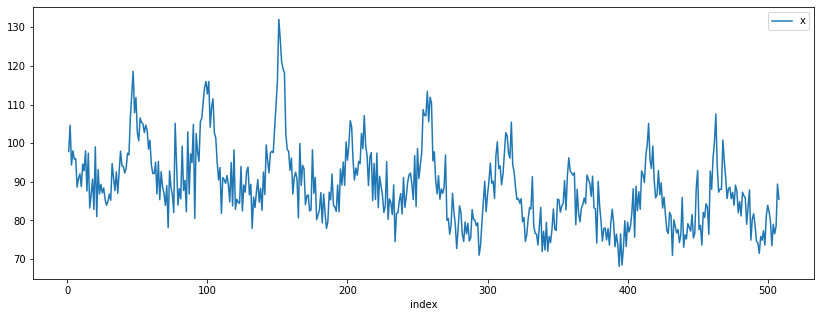

In [88]:
# Visualization
df9.plot(
    x = 'index', 
    y = 'x',
    figsize = (14,5)
)
plt.show()

There's a minor downtrend and cylic pattern in this data.

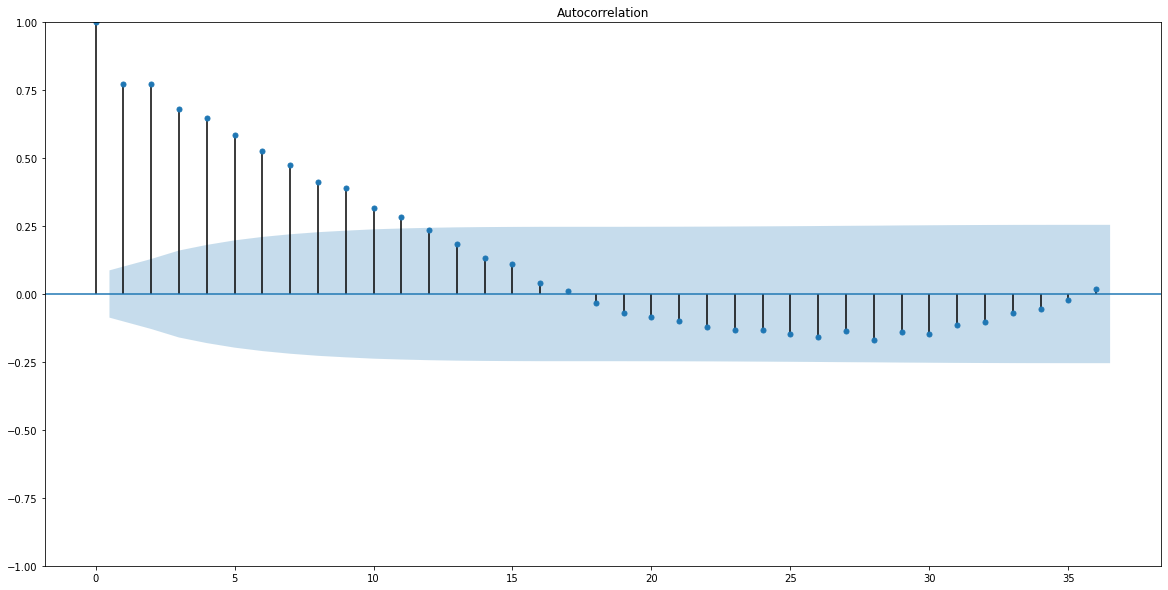

In [89]:
# ACF plot
plot_acf(
    df9['x'], 
    lags = 36
).set_size_inches((20,10));

There is an exponential decay trend that makes us should immediately ignore this plot.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


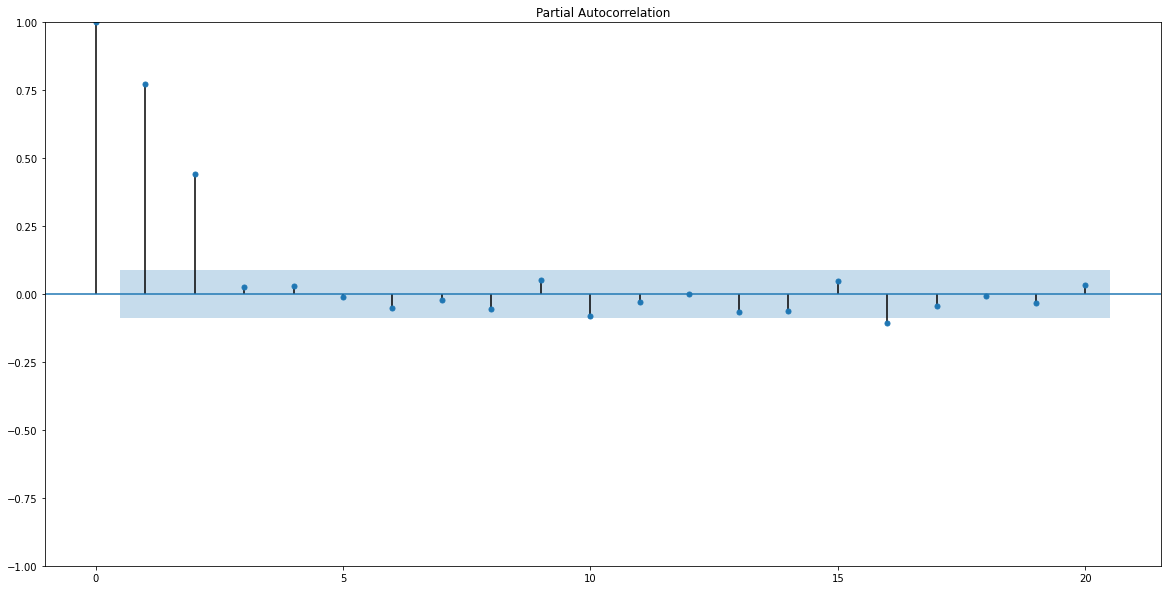

In [90]:
# PACF plot
plot_pacf(
    df9['x'], 
    lags = 20
).set_size_inches((20,10));

For the PACF plot, there are lag2 untill 2. So it means AR 2.

###ADF TEST

In [91]:
adf_test(df9['x'])

Results of Dickey-Fuller Test:
Test Statistic                  -4.815688
p-value                          0.000051
#Lags Used                       1.000000
Number of Observations Used    506.000000
Critical Value (1%)             -3.443340
Critical Value (5%)             -2.867269
Critical Value (10%)            -2.569821
dtype: float64


The p-value is below 5%, so I think we don't have to do differencing and accept null hypothesis.

###INTERPRETATION

Because the p-value is below 5%, I think we don't need to execute differencing. So the *d* is 0.

For ACF that represents *q* or MA, there's an exponential decay tren. So, I think it will be ignored.

For PACF that represents *p* or AR, has significant lag at 2. (*p* = 1)

So according to *p*, *d*, *q* value this time series is (2,0,0) which means it is `AR 2` time series.

###EXPLANATION
`AR (2)` means that there are 2 lags of AR to be used as predictors for the prediction model.

##Data 10

In [92]:
# Check dataset
df10.head()

,index,x
0,1,11.158810
1,2,9.917591
2,3,9.824230
3,4,8.855909
4,5,9.264166


In [93]:
# Check data structure
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   150 non-null    int64  
 1   x       150 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.5 KB


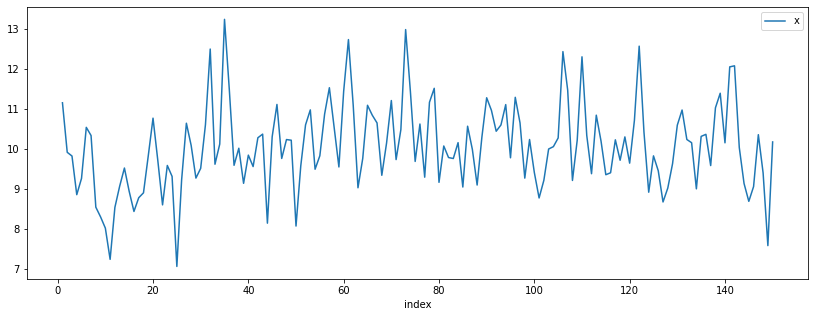

In [94]:
# Visualization
df10.plot(
    x = 'index', 
    y = 'x',
    figsize = (14,5)
)
plt.show()

There're still an uptrend and downtrend pattern in this visualization. And I think there isn't any cylic and sesasonal pattern.

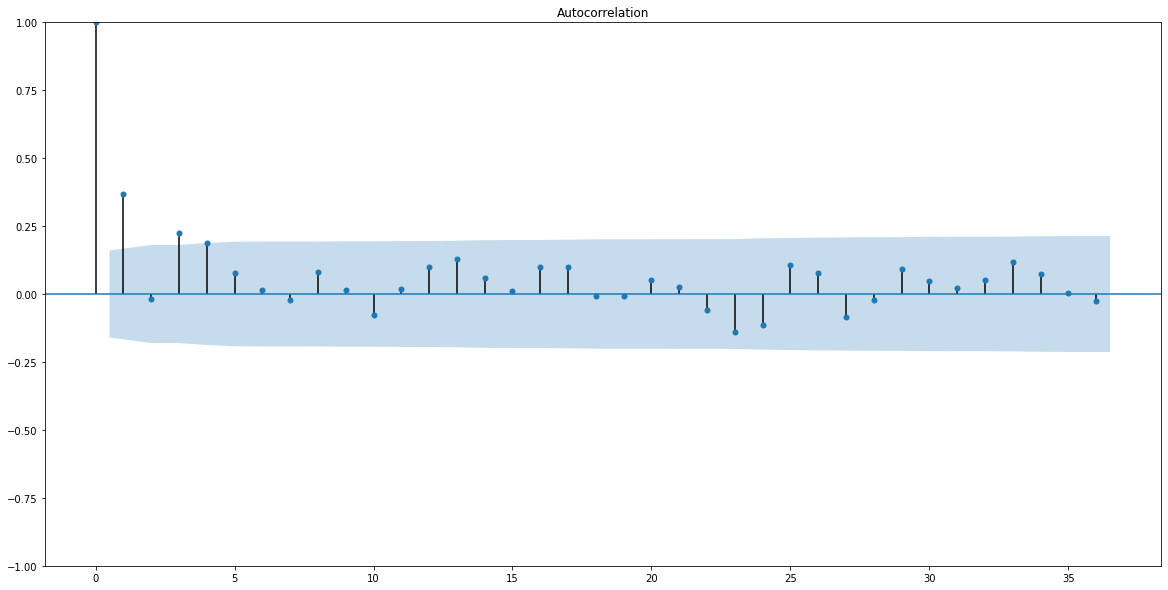

In [95]:
# ACF plot
plot_acf(
    df10['x'], 
    lags = 36
).set_size_inches((20,10));

ACF plot tells us that there is lag at 1 point and stop at lag 2. So it will be MA 1.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


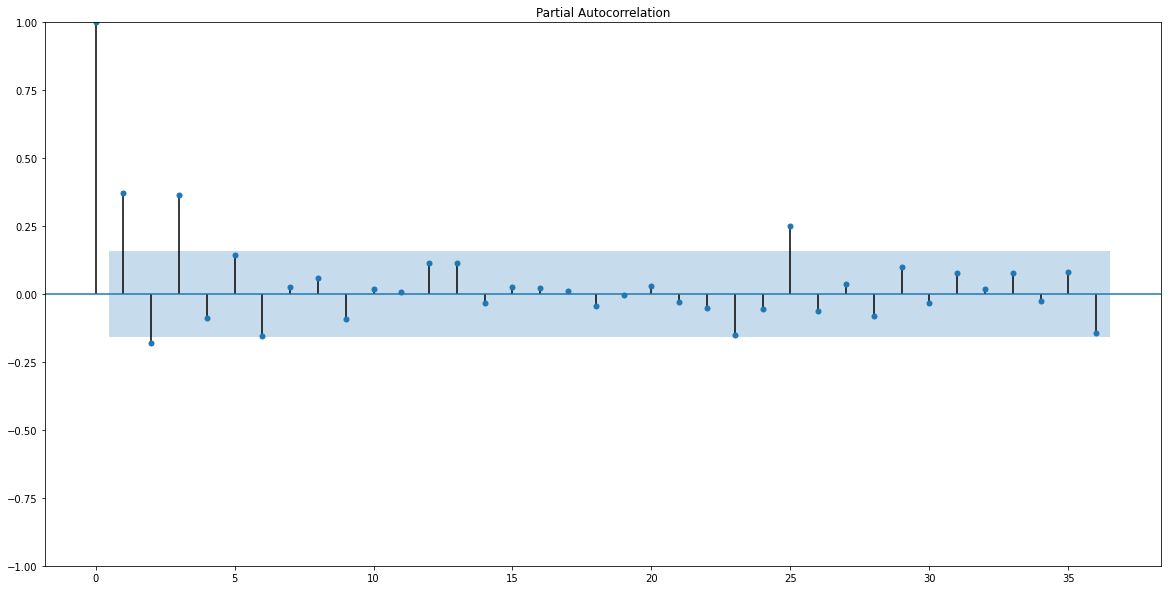

In [ ]:
# PACF plot
plot_pacf(
    df10['x'], 
    lags = 36
).set_size_inches((20,10));

For PACF plot, the lag is untill lag 3. So, it will be an AR 3.

###ADF TEST

In [96]:
adf_test(df10['x'])

Results of Dickey-Fuller Test:
Test Statistic                  -4.112777
p-value                          0.000922
#Lags Used                       5.000000
Number of Observations Used    144.000000
Critical Value (1%)             -3.476598
Critical Value (5%)             -2.881829
Critical Value (10%)            -2.577589
dtype: float64


P-value is below 5% so we don't have to reject the null hypothesis and do the differencing.

###INTERPRETATION

Because the p-value is below 5%, I think we don't need to execute differencing. So the *d* is 0.

For ACF that represents *q* or MA, there's lag at 1. (*q* = 1)

For PACF that represents *p* or AR, has significant lag at 1. (*p* = 3)

So according to *p*, *d*, *q* value this time series is (3,0,1) which means it is `ARMA 3,1` time series.

# Time Series Analysis - Advanced

##Data Understanding

In [12]:
# Check dataset
ecommerce.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,GMV
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.920000
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.820000
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,29.240000
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2633.338125
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,35.788800


In [13]:
# Check data structure
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         8000 non-null   int64  
 1   Order ID       8000 non-null   object 
 2   Order Date     8000 non-null   object 
 3   Ship Date      8000 non-null   object 
 4   Ship Mode      8000 non-null   object 
 5   Customer ID    8000 non-null   object 
 6   Customer Name  8000 non-null   object 
 7   Segment        8000 non-null   object 
 8   Country        8000 non-null   object 
 9   City           8000 non-null   object 
 10  State          8000 non-null   object 
 11  Postal Code    8000 non-null   int64  
 12  Region         8000 non-null   object 
 13  Product ID     8000 non-null   object 
 14  Category       8000 non-null   object 
 15  Sub-Category   8000 non-null   object 
 16  Product Name   8000 non-null   object 
 17  Sales          8000 non-null   float64
 18  Quantity

In [14]:
# Change data type
ecommerce["Order Date"] = pd.to_datetime(ecommerce["Order Date"])
ecommerce["Ship Date"] = pd.to_datetime(ecommerce["Ship Date"])

In [15]:
# Check data structure again
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         8000 non-null   int64         
 1   Order ID       8000 non-null   object        
 2   Order Date     8000 non-null   datetime64[ns]
 3   Ship Date      8000 non-null   datetime64[ns]
 4   Ship Mode      8000 non-null   object        
 5   Customer ID    8000 non-null   object        
 6   Customer Name  8000 non-null   object        
 7   Segment        8000 non-null   object        
 8   Country        8000 non-null   object        
 9   City           8000 non-null   object        
 10  State          8000 non-null   object        
 11  Postal Code    8000 non-null   int64         
 12  Region         8000 non-null   object        
 13  Product ID     8000 non-null   object        
 14  Category       8000 non-null   object        
 15  Sub-Category   8000 n

In [16]:
# Check duplicate rows
ecommerce.duplicated().sum()

0

In [17]:
# Check unique value
for x in ecommerce.columns:
  print(f"unique of {x} ")
  print(f"{ecommerce[x].unique()}")
  print()

unique of Row ID 
[   1    2    3 ... 7998 7999 8000]

unique of Order ID 
['CA-2016-152156' 'CA-2016-138688' 'US-2015-108966' ... 'US-2015-165743'
 'US-2017-105998' 'US-2014-148194']

unique of Order Date 
['2016-11-08T00:00:00.000000000' '2016-06-12T00:00:00.000000000'
 '2015-10-11T00:00:00.000000000' ... '2014-05-31T00:00:00.000000000'
 '2014-01-03T00:00:00.000000000' '2016-07-20T00:00:00.000000000']

unique of Ship Date 
['2016-11-11T00:00:00.000000000' '2016-06-16T00:00:00.000000000'
 '2015-10-18T00:00:00.000000000' ... '2017-07-30T00:00:00.000000000'
 '2016-04-30T00:00:00.000000000' '2014-05-07T00:00:00.000000000']

unique of Ship Mode 
['Second Class' 'Standard Class' 'First Class' 'Same Day']

unique of Customer ID 
['CG-12520' 'DV-13045' 'SO-20335' 'BH-11710' 'AA-10480' 'IM-15070'
 'HP-14815' 'PK-19075' 'AG-10270' 'ZD-21925' 'KB-16585' 'SF-20065'
 'EB-13870' 'EH-13945' 'TB-21520' 'MA-17560' 'GH-14485' 'SN-20710'
 'LC-16930' 'RA-19885' 'ES-14080' 'ON-18715' 'PO-18865' 'LH-16900

##Data Aggregation

###Question 1

Count total customers, total TRX, GMV, and profit in daily, weekly, and monthly.

In [18]:
# Create GMV column
ecommerce['GMV'] = ecommerce["Quantity"]*(ecommerce["Sales"] - ecommerce["Discount"]*ecommerce['Sales'])

In [19]:
# Check new column
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         8000 non-null   int64         
 1   Order ID       8000 non-null   object        
 2   Order Date     8000 non-null   datetime64[ns]
 3   Ship Date      8000 non-null   datetime64[ns]
 4   Ship Mode      8000 non-null   object        
 5   Customer ID    8000 non-null   object        
 6   Customer Name  8000 non-null   object        
 7   Segment        8000 non-null   object        
 8   Country        8000 non-null   object        
 9   City           8000 non-null   object        
 10  State          8000 non-null   object        
 11  Postal Code    8000 non-null   int64         
 12  Region         8000 non-null   object        
 13  Product ID     8000 non-null   object        
 14  Category       8000 non-null   object        
 15  Sub-Category   8000 n

In [20]:
# Days column
ecommerce["days"] = ecommerce['Order Date'].dt.day

# Weeks column
ecommerce["weekdays"] = [x.strftime('%A') for x in ecommerce["Order Date"]]

# Months column
ecommerce["months"] = ecommerce["Order Date"].dt.month


In [21]:
# Daily customer
customer_daily = ecommerce.groupby("days",as_index=False).agg({"Customer ID":lambda x: x.nunique()})

# Weekly customer
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
customer_weekly = ecommerce.groupby("weekdays",as_index=False).agg({"Customer ID":lambda x: x.nunique()})

# Monthly customer
customer_monthly = ecommerce.groupby("months",as_index=False).agg({"Customer ID":lambda x: x.nunique()})

**TOTAL CUSTOMER**

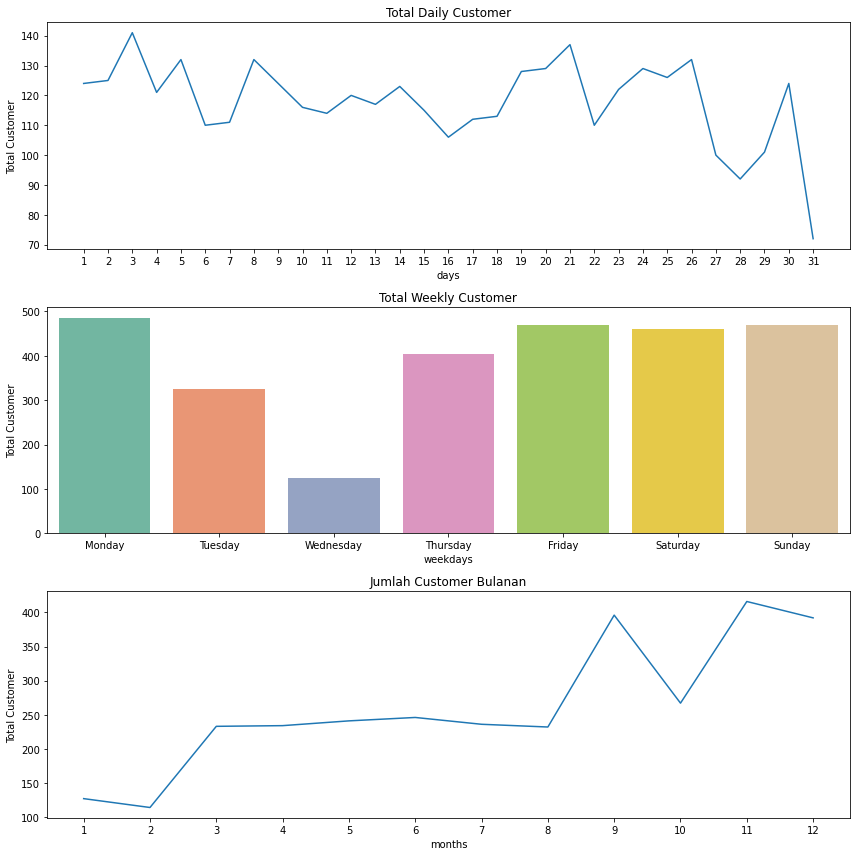

In [22]:
# Visualization
plt.figure(figsize=(12,12))
plt.subplot(311)
sns.lineplot(data=customer_daily,x="days",y="Customer ID").set_title("Total Daily Customer")
plt.xticks([i for i in np.arange(1,32)])
plt.ylabel("Total Customer")

plt.subplot(312)
sns.barplot(data=customer_weekly,x="weekdays",y="Customer ID",order=order, palette = "Set2").set_title("Total Weekly Customer")
plt.ylabel("Total Customer")

plt.subplot(313)
sns.lineplot(data=customer_monthly,x="months",y="Customer ID").set_title("Jumlah Customer Bulanan")
plt.xticks([i for i in np.arange(1,13)])
plt.ylabel("Total Customer")

plt.tight_layout()
plt.show()

From the visualization above I conclude that:
1. The total daily customer has a downtrend pattern, which the peak is on the early dates and drop slowly until the end date. In my opinion it makes sense, maybe because on the early dates customer received their first salary and in the middle of the month they received their second salary. So, that's why the trend tends to decrease from the early dates to middle date, but in the middle of the month the trend is increased. After that the trend is decreased again till reach the bottom at the end of the date.

2. From total weekly customer, I get insight that Wednesday is the bottom of the trend where the customer orders the least every week.

3. Total monthly customer tells us that it has uptrend pattern. In the early months it has the minimum customer and stable in the middle of the year. But, going to the end of the year, it has a significant uptrend that I think it because the preparation for the event in the last year that is christmass.

**TOTAL TRANSACTION**

In [23]:
# Daily transaction 
trx_daily = ecommerce.groupby("days",as_index=False)["Order ID"].size()

# Weekly transaction
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
trx_weekly = ecommerce.groupby("weekdays",as_index=False)["Order ID"].size()

# Monthly transaction
trx_monthly = ecommerce.groupby("months",as_index=False)["Order ID"].size()

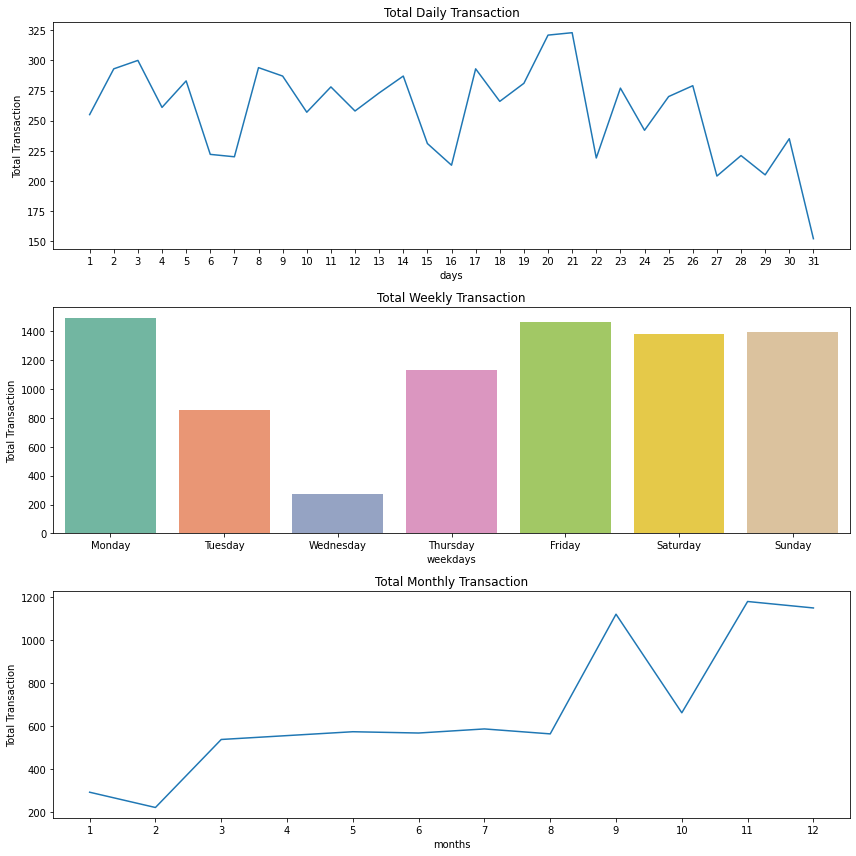

In [24]:
# Visualization
plt.figure(figsize=(12,12))
plt.subplot(311)
sns.lineplot(data=trx_daily,x="days",y="size").set_title("Total Daily Transaction")
plt.xticks([i for i in np.arange(1,32)])
plt.ylabel("Total Transaction")

plt.subplot(312)
sns.barplot(data=trx_weekly,x="weekdays",y="size", order = order, palette = "Set2").set_title("Total Weekly Transaction")
plt.ylabel("Total Transaction")

plt.subplot(313)
sns.lineplot(data=trx_monthly,x="months",y="size").set_title("Total Monthly Transaction")
plt.xticks([i for i in np.arange(1,13)])
plt.ylabel("Total Transaction")

plt.tight_layout()
plt.show()

From the visualization above I can conclude that:
1. Total daily transaction has an insignificant downtrend pattern and also has seasonal and cyclical pattern.

2. Same as previous data trend from weekly total customer, the weekly total transaction or order has the very least number on Wednesday.

3. It is also same as previous data where the trend is at the bottom in the early months of the year then increase at the first quarter. From August to December, there is an uptrend pattern.

**TOTAL GMV**

In [25]:
# Daily gmv
gmv_daily = ecommerce.groupby("days",as_index=False)["GMV"].sum()

# Weekly gmv
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
gmv_weekly = ecommerce.groupby("weekdays",as_index=False)["GMV"].sum()

# Monthly gmv
gmv_monthly = ecommerce.groupby("months",as_index=False)["GMV"].sum()

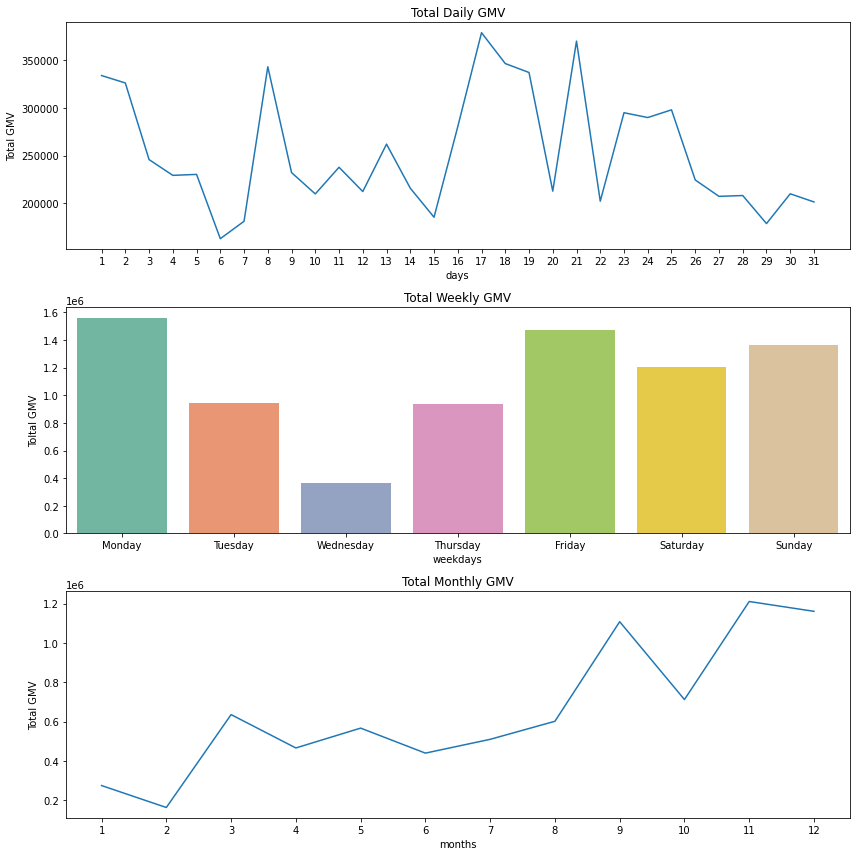

In [26]:
# Visualization
plt.figure(figsize=(12,12))
plt.subplot(311)
sns.lineplot(data=gmv_daily,x="days",y="GMV").set_title("Total Daily GMV")
plt.xticks([i for i in np.arange(1,32)])
plt.ylabel("Total GMV")

plt.subplot(312)
sns.barplot(data=gmv_weekly,x="weekdays",y="GMV",order=order, palette = "Set2").set_title("Total Weekly GMV")
plt.ylabel("Toltal GMV")

plt.subplot(313)
sns.lineplot(data=gmv_monthly,x="months",y="GMV").set_title("Total Monthly GMV")
plt.xticks([i for i in np.arange(1,13)])
plt.ylabel("Total GMV")

plt.tight_layout()
plt.show()

From the visualization above I conclude that:
1. The total daily GMV has a stable trend eventhough fluctuative. In my opinion, there is also a cyclical pattern every 6-7 days. From 15 to the last date, there is seasonal pattern and has a downtrend pattern.

2. For total weekly GMV, I think I should do further analysis for Saturday and Sunday. Because in previous charts of weekly customer and transactions, they tell us that on Saturday and Sunday there are high traffic for ordering in the ecommerce.

3. In the last plot, total monthly GMV in the early year at its mininum similarly with customer and transaction. But in the end of first quarter, GMV is increased and goes fluctuative but stable for 5 months. Then in the middle of third quarter, it has an uptrend pattern until the last month of the year. And its peak is at month 11.

**TOTAL PROFIT**

In [27]:
# Daily profit
profit_daily = ecommerce.groupby("days",as_index=False)["Profit"].sum()

# Weekly profit
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
profit_weekly = ecommerce.groupby("weekdays",as_index=False)["Profit"].sum()

# Monthly profit
profit_monthly = ecommerce.groupby("months",as_index=False)["Profit"].sum()

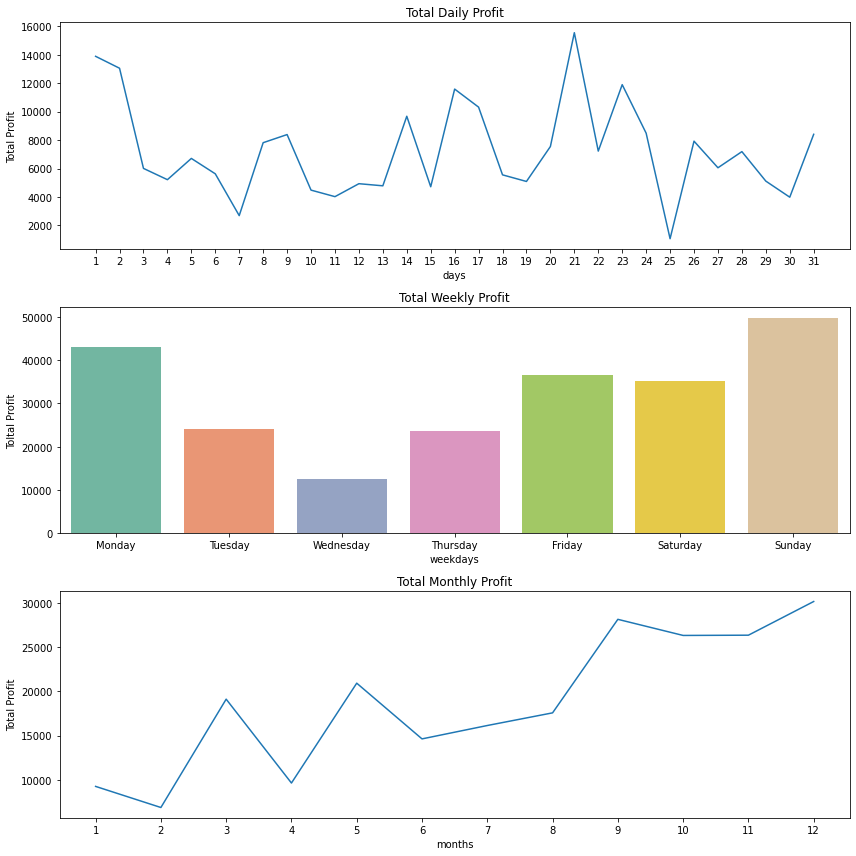

In [28]:
# Visualization
plt.figure(figsize=(12,12))
plt.subplot(311)
sns.lineplot(data=profit_daily,x="days",y="Profit").set_title("Total Daily Profit")
plt.xticks([i for i in np.arange(1,32)])
plt.ylabel("Total Profit")

plt.subplot(312)
sns.barplot(data=profit_weekly,x="weekdays",y="Profit",order=order, palette = "Set2").set_title("Total Weekly Profit")
plt.ylabel("Toltal Profit")

plt.subplot(313)
sns.lineplot(data=profit_monthly,x="months",y="Profit").set_title("Total Monthly Profit")
plt.xticks([i for i in np.arange(1,13)])
plt.ylabel("Total Profit")

plt.tight_layout()
plt.show()

From the visualization above I conclude that:
1. There's an insignificant trend if I saw the chart as a whole, the trend is stable for daily profit. But if I divided the chart into four pieces, from 1-7 there is downtrend pattern, and stable from 8-14. Then there is an uptrend from 14-21 and downtrend from 22-31. I see no cyclical and seasonal pattern in this plot.

2. As I see in weekly profit chart, Sunday has the most profit of them all.

3. Monthly profit for a year has an uptrend pattern. It makes sense for the end of the year that make the most profit transaction. But in month 4, the customer and transaction are stable but the profit from that month drop almost reach the minimum point like month 2. I think I will analyze for further explanation.

###Question 2

Count monthly retention

In [29]:
# Define function that converts date to year month
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
  
# Create the order month period column
ecommerce['Order Month'] = ecommerce['Order Date'].apply(get_month)
ecommerce.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,GMV,days,weekdays,months,Order Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.920000,8,Tuesday,11,2016-11-01
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.820000,8,Tuesday,11,2016-11-01
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,29.240000,12,Sunday,6,2016-06-01
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2633.338125,11,Sunday,10,2015-10-01
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,35.788800,11,Sunday,10,2015-10-01


In [30]:
# Group by customerID and select only the order month column
grouping = ecommerce.groupby('Customer ID')['Order Month']

# Take the earliest date of each customer and assign it back to the orignal dataset
ecommerce['CohortMonth'] = grouping.transform('min')

In [31]:
# Define function that gets us the integer value of year and month

def get_date_int(df, column):
   year = df[column].dt.year
   month = df[column].dt.month
   return year, month
  
# Get the integers for the date parts from the 'Order Month' column
invoice_year, invoice_month = get_date_int(ecommerce, 'Order Month')

# Get the integers for date parts from the 'Cohortmonth' column
cohort_year, cohort_month = get_date_int(ecommerce, 'CohortMonth')

# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Extract the difference in months from all previous values
ecommerce['CohortIndex'] = years_diff * 12 + months_diff + 1
ecommerce.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,GMV,days,weekdays,months,Order Month,CohortMonth,CohortIndex
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.920000,8,Tuesday,11,2016-11-01,2015-10-01,14
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.820000,8,Tuesday,11,2016-11-01,2015-10-01,14
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,29.240000,12,Sunday,6,2016-06-01,2016-06-01,1
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2633.338125,11,Sunday,10,2015-10-01,2015-10-01,1
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,35.788800,11,Sunday,10,2015-10-01,2015-10-01,1


In [32]:
grouping = ecommerce.groupby(['CohortMonth', 'CohortIndex'])

# Count the number of unique values per Customer ID
cohort_data = grouping['Customer ID'].apply(pd.Series.nunique).reset_index()

# Create a pivot
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Customer ID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)*100

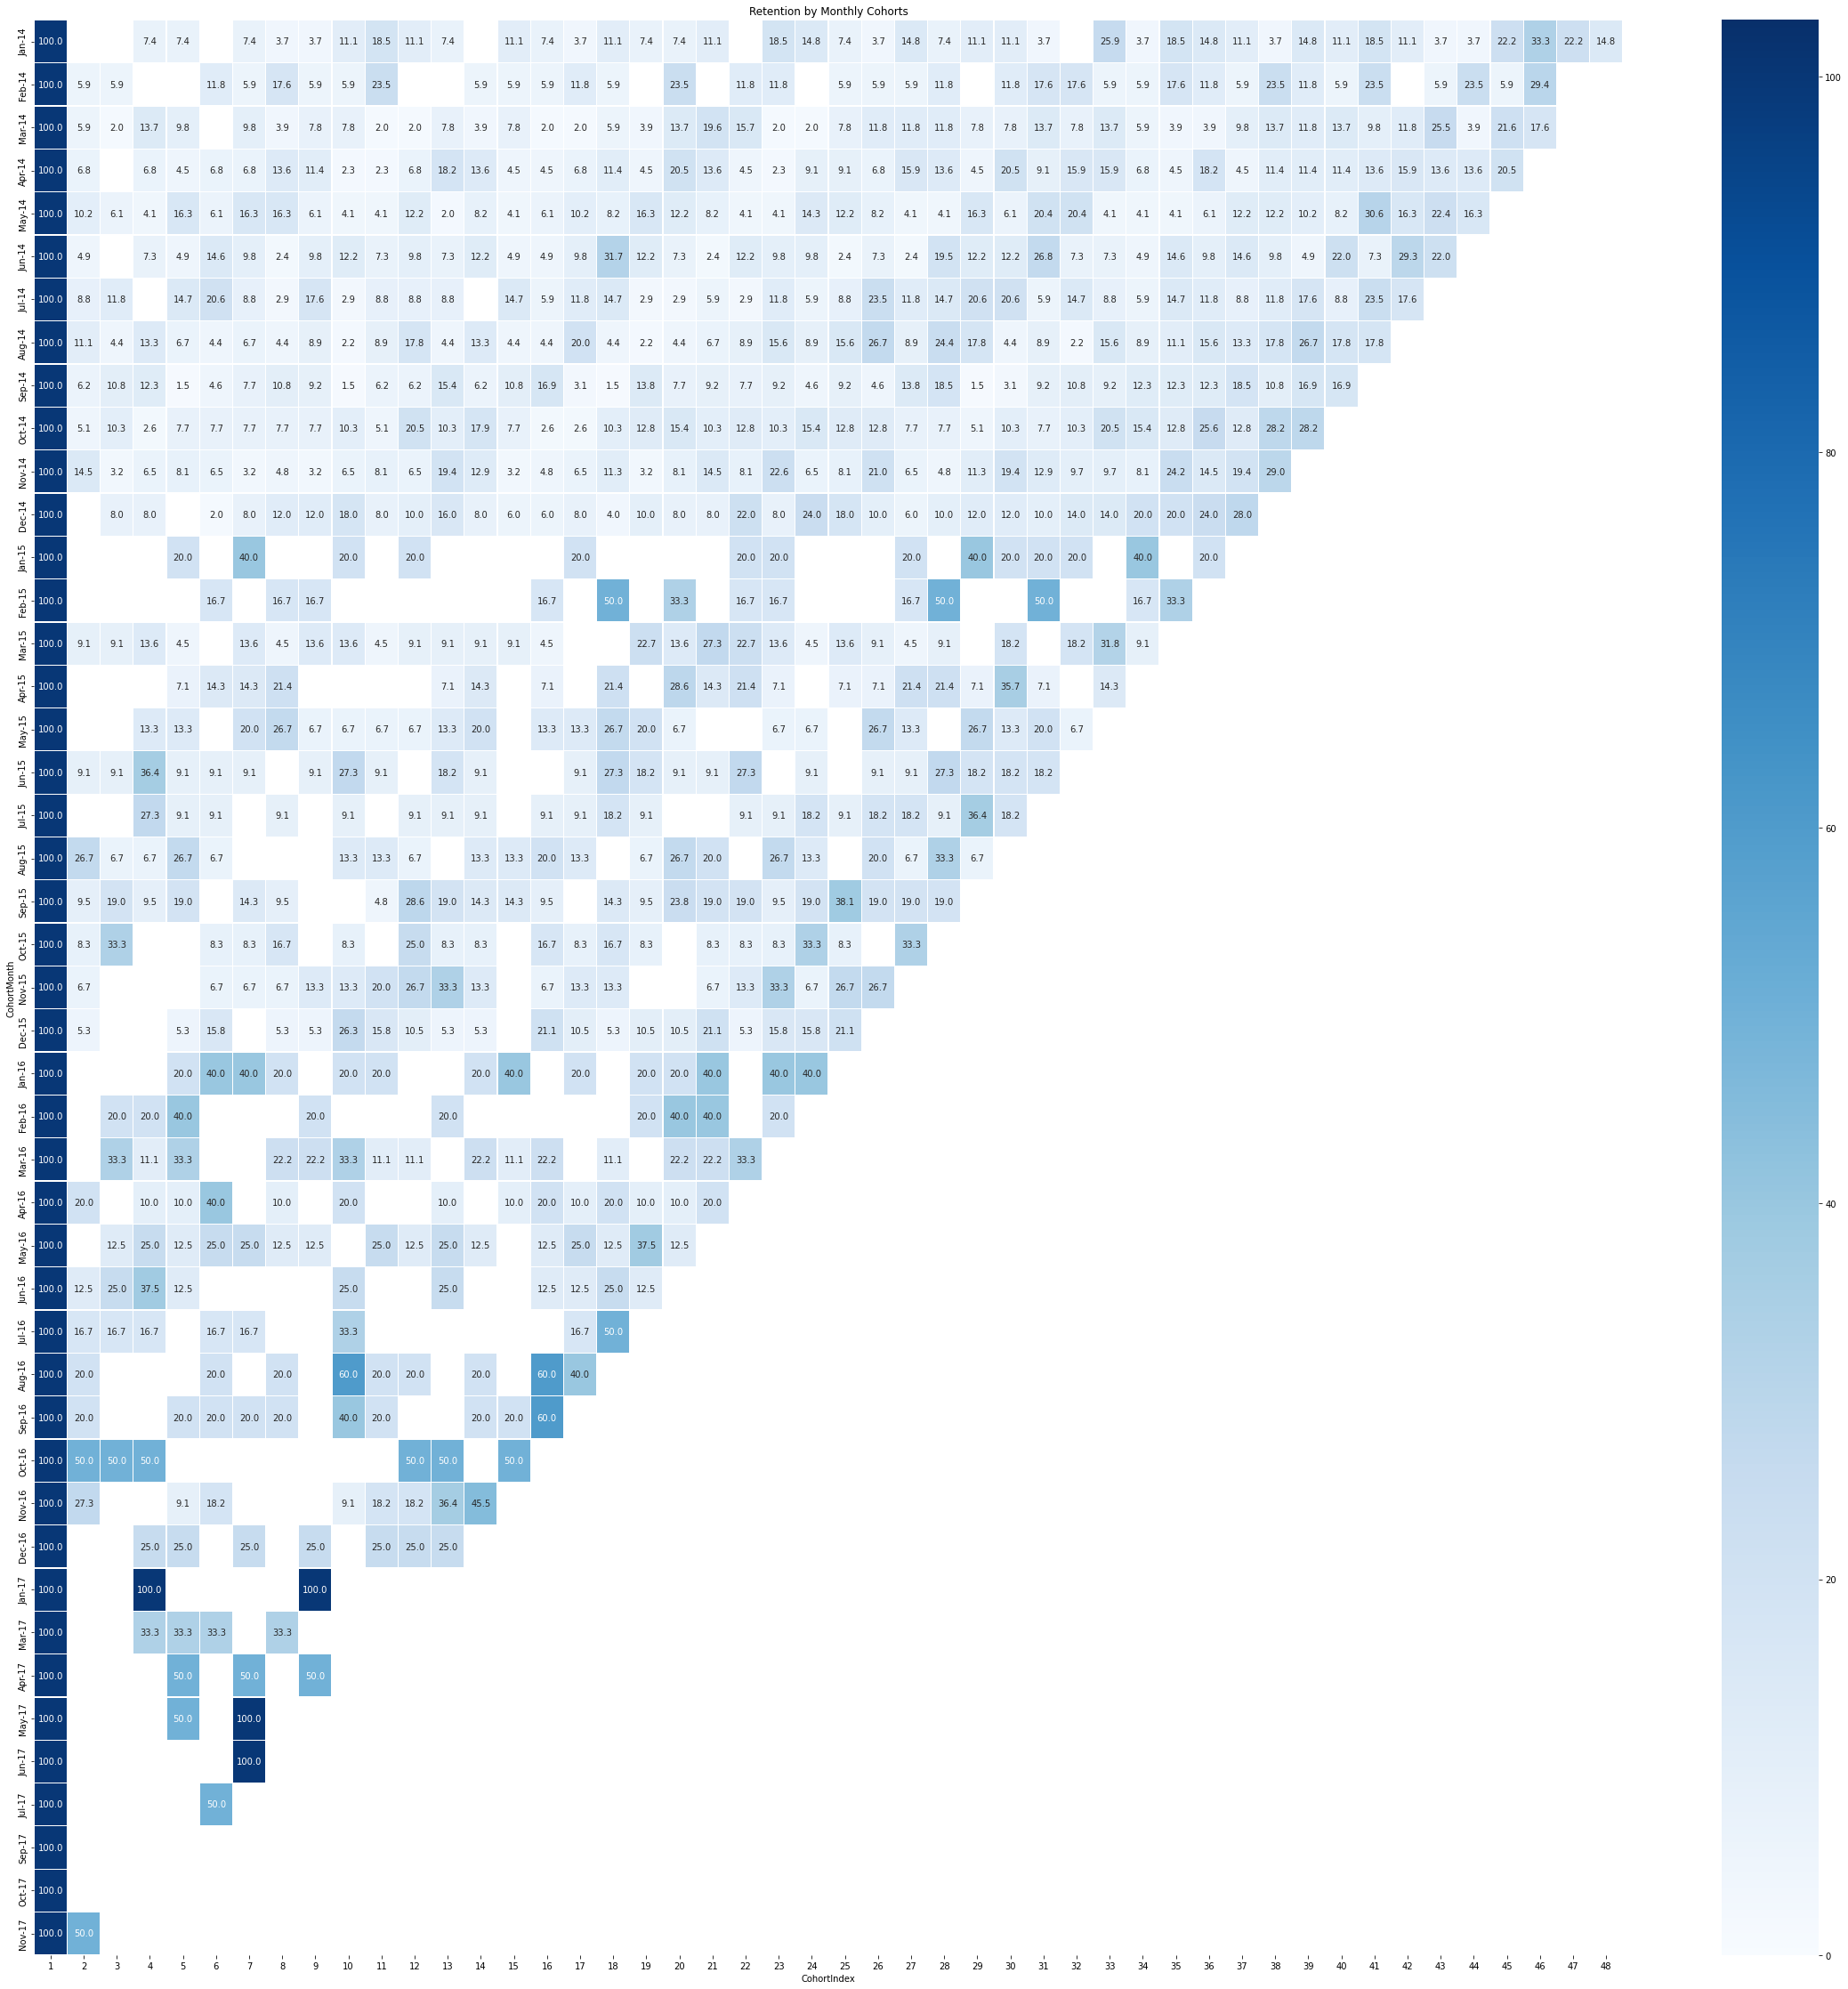

In [33]:
# Create list of month names for visualisation
month_list = retention.reset_index()['CohortMonth']

def get_month_name(x):
   return dt.datetime.strftime(x, '%b-%y')
  
month_list = month_list.apply(get_month_name)

# Initialize inches plot figure
plt.figure(figsize=(40,40))

# Add a title
plt.title('Retention by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data=retention,
annot = True,
cmap = "Blues",
vmin = 0.0,
vmax = list(retention.max().sort_values(ascending = False))[1]+3,
fmt = '.1f',
linewidth = 0.3,
yticklabels=month_list)
plt.show();

###Question 3

Identify products with the highest profit in the latest 3 months

In [34]:
# Check the latest date of dataset
ecommerce["Order Date"].max()

Timestamp('2017-12-30 00:00:00')

In [35]:
# Assign new variable that contains order from specific date
products_3m = ecommerce[(ecommerce['Order Date']>='2017-10-01 00:00:00')&(ecommerce['Order Date']<='2017-12-30 00:00:00')].copy()

In [36]:
# Assign new variable that contains top 5 product from previous variable
top5 = products_3m.groupby("Product Name")["Profit"].sum().nlargest()
top5

Product Name
Canon imageCLASS 2200 Advanced Copier               8959.9744
3D Systems Cube Printer, 2nd Generation, Magenta    1351.9896
Adjustable Depth Letter/Legal Cart                  1065.1702
Hewlett Packard LaserJet 3310 Copier                1007.9832
GBC DocuBind TL300 Electric Binding System           843.1706
Name: Profit, dtype: float64

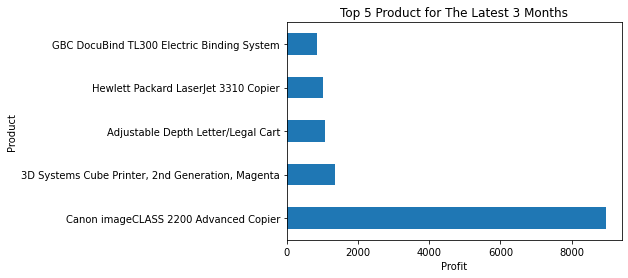

In [37]:
# Visualization
top5.plot.barh()

plt.title('Top 5 Product for The Latest 3 Months')
plt.ylabel('Product')
plt.xlabel('Profit')
plt.show()

The top 5 product sales that makes the most profit for ecommerce from the latest 3 months are `Canon imageCLASS 2200 Advanced Copier`, `3D Systems Cube Printer, 2nd Generation, Magenta`, `Adjustable Depth Letter/Legal Cart`, `Hewlett Packard LaserJet 3310 Copier`, `GBC DocuBind TL300 Electric Binding System`.

###Question 4

Make at least 2 Model to predict total visitor and total transaction for 1 month ahead using daily data, and get the best fit model by looking at the MAPE. Recommend to business team what to do according to the forecasting and analysis result.

####Exploration

In [38]:
# Make new dataset for predict total visitor with 3 months data
visitor = products_3m.groupby('Order Date').agg({"Customer ID":lambda x: x.nunique()})
visitor = visitor.rename(columns = {'Customer ID' : 'Total Customer'})
visitor.index = pd.PeriodIndex(visitor.index, freq = 'D')
visitor.head()

,Total Customer
Order Date,
2017-10-01,5
2017-10-02,9
2017-10-03,5
2017-10-04,1
2017-10-05,5


In [39]:
# Make new dataset for predict transaction with 3 months data
trx = products_3m.groupby('Order Date')["Order ID"].size()
trx.index = pd.PeriodIndex(trx.index, freq = 'D')
trx.head()

Order Date
2017-10-01    11
2017-10-02    24
2017-10-03     8
2017-10-04     1
2017-10-05    15
Freq: D, Name: Order ID, dtype: int64

##### Predicting Total Visitor

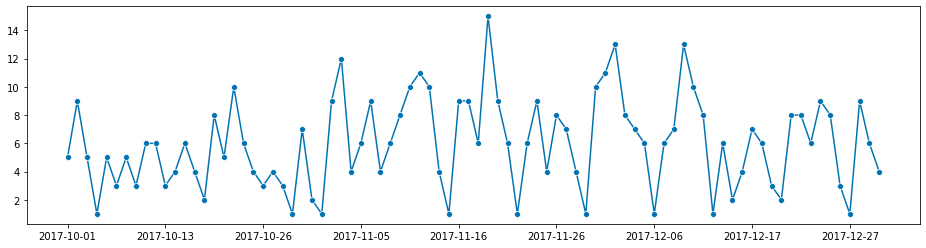

In [42]:
# plot time series data
plot_series(visitor);

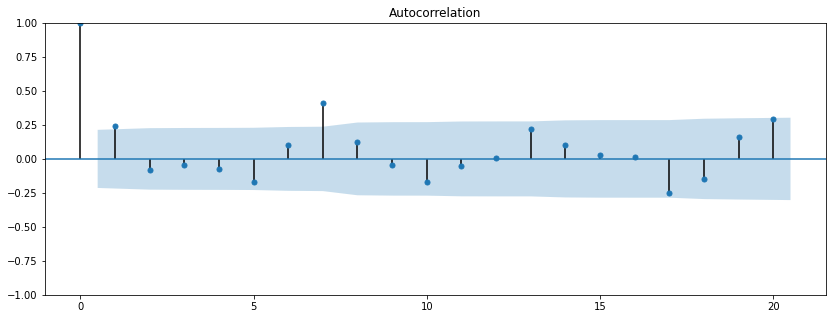

In [43]:
# plot ACF
plot_acf(visitor).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


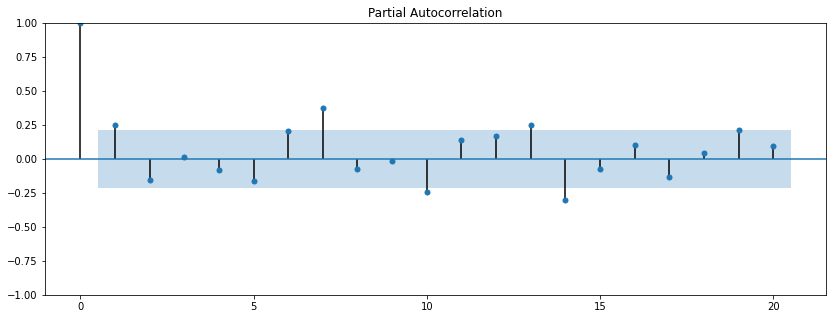

In [44]:
# plot PACF
plot_pacf(visitor).set_size_inches((14,5));

In [45]:
# Do train-test split
vy_train, vy_test = temporal_train_test_split(visitor, test_size=36)

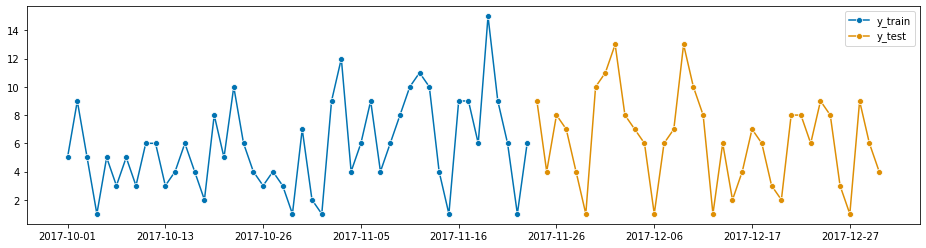

In [46]:
# check the time series after splitting
plot_series(vy_train, vy_test, labels=["y_train", "y_test"]);

In [47]:
#specific data points
fhv = ForecastingHorizon(vy_test.index, is_relative=False)

In [48]:
fhv

ForecastingHorizon(['2017-11-24', '2017-11-25', '2017-11-26', '2017-11-27',
             '2017-11-28', '2017-11-29', '2017-11-30', '2017-12-01',
             '2017-12-02', '2017-12-03', '2017-12-04', '2017-12-05',
             '2017-12-06', '2017-12-07', '2017-12-08', '2017-12-09',
             '2017-12-10', '2017-12-11', '2017-12-13', '2017-12-14',
             '2017-12-15', '2017-12-16', '2017-12-17', '2017-12-18',
             '2017-12-19', '2017-12-20', '2017-12-21', '2017-12-22',
             '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
             '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30'],
            dtype='period[D]', is_relative=False)

In [67]:
# define auto ets forecaster model
auto_ets_forecaster = AutoETS(auto=True, sp=10)

In [68]:
# fit forecaster to train data
auto_ets_forecaster.fit(vy_train)

AutoETS(auto=True, sp=10)

In [69]:
# do prediction based on forecast horizon we already defined
vy_pred_auto_ets = auto_ets_forecaster.predict(fh=fhv)

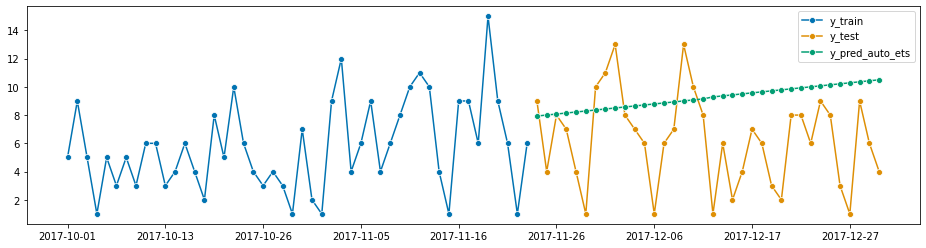

In [70]:
# plot the forecast result
plot_series(vy_train, vy_test, vy_pred_auto_ets, labels=["y_train", "y_test", "y_pred_auto_ets"]);

In [72]:
# find residuals
vresiduals = vy_test - vy_pred_auto_ets

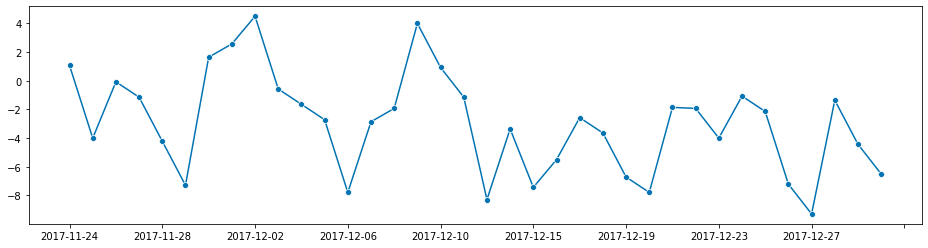

In [73]:
plot_series(vresiduals);

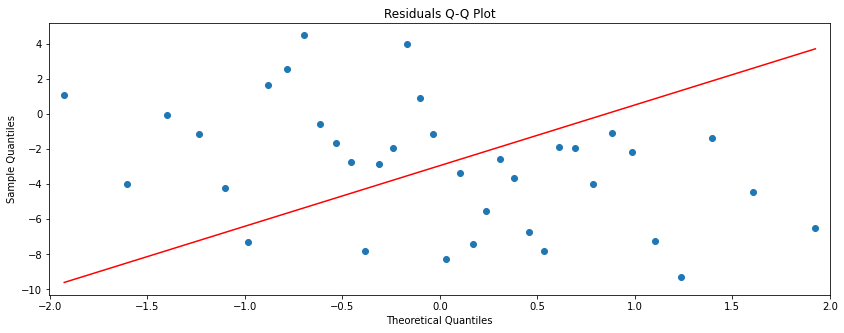

In [74]:
sm.qqplot(vresiduals, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot")
plt.show()

In [75]:
mean_absolute_percentage_error(vy_test, vy_pred_auto_ets) * 100

158.30906786050744

Saya masih bingung mas Hadi. Nanti saya ulik lagi jika ada kesempatan hehe.